# Heart Disease Prediction

## Problem Statement

Cardiovascular diseases are the leading cause of death globally, taking an estimated 17.9 million lives each year. Early detection and treatment are crucial in reducing mortality rates and improving patient outcomes. The goal of this project is to develop a machine learning model to predict the likelihood of heart disease in patients based on their medical attributes and health metrics.

## Objectives
1. **Data Preprocessing**: Clean and prepare the dataset for modeling.
2. **Exploratory Data Analysis**: Understand the dataset through visualizations and summary statistics.
3. **Feature Engineering**: Create and select features that improve the model's predictive power.
4. **Modeling**: Train and evaluate multiple machine learning models to determine the best performing model.
5. **Hyperparameter Tuning**: Optimize the model's performance through hyperparameter tuning.
6. **Model Evaluation**: Assess the model using appropriate metrics, ensuring its robustness and reliability.
7. **Deployment**: Deploy the final model using Flask to provide a user-friendly interface for making predictions.

## Dataset
The dataset used for this project contains various medical and demographic attributes of patients, such as age, sex, cholesterol levels, blood pressure, and more. The target variable indicates the presence or absence of heart disease.

## Evaluation Metrics
The performance of the models will be evaluated using the ROC AUC score, which measures the model's ability to distinguish between patients with and without heart disease.


In [20]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [21]:
print("Matplotlib version:", plt.__version__)
print("Numpy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Seaborn Version:", sns.__version__)
print('XG Boost: ', xgb.__version__)

Matplotlib version: 3.8.4
Numpy Version: 1.26.4
Pandas Version: 2.2.2
Seaborn Version: 0.13.2
XG Boost:  2.1.0


In [2]:
df= pd.read_csv("Data/heart.csv")

In [4]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0

In [27]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.duplicated().sum().any()

False

In [25]:
df.describe().T

count   mean    std   min    25%    50%    75%    max
Age          918.00  53.51   9.43 28.00  47.00  54.00  60.00  77.00
RestingBP    918.00 132.40  18.51  0.00 120.00 130.00 140.00 200.00
Cholesterol  918.00 198.80 109.38  0.00 173.25 223.00 267.00 603.00
FastingBS    918.00   0.23   0.42  0.00   0.00   0.00   0.00   1.00
MaxHR        918.00 136.81  25.46 60.00 120.00 138.00 156.00 202.00
Oldpeak      918.00   0.89   1.07 -2.60   0.00   0.60   1.50   6.20
HeartDisease 918.00   0.55   0.50  0.00   0.00   1.00   1.00   1.00

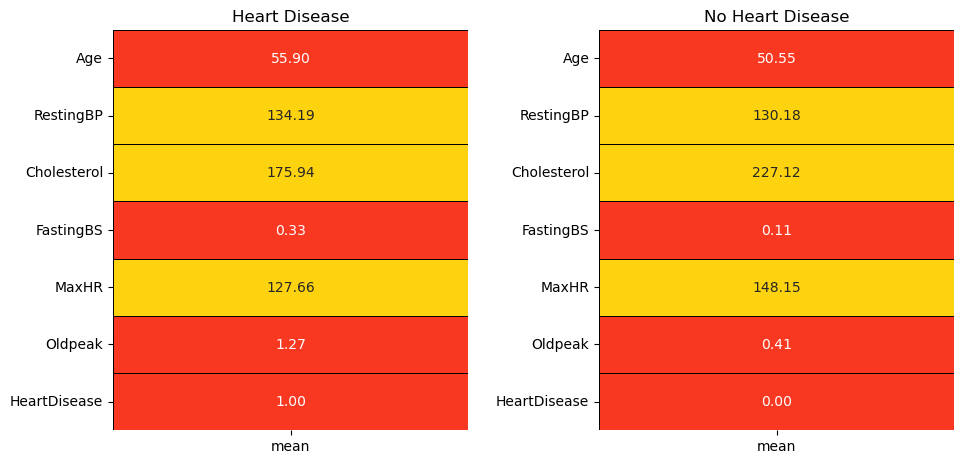

In [38]:
yes = df[df['HeartDisease'] == 1].describe().T
no = df[df['HeartDisease'] == 0].describe().T

colors = ['#F93822', '#FDD20E']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(
    yes[['mean']],
    annot=True,
    cmap=colors,
    linewidths=0.4,
    linecolor='black',
    cbar=False,
    fmt='.2f'
)
plt.title('Heart Disease')  

plt.subplot(1, 2, 2)
sns.heatmap(
    no[['mean']],
    annot=True,
    cmap=colors,
    linewidths=0.4,
    linecolor='black',
    cbar=False,
    fmt='.2f'
)
plt.title('No Heart Disease') 

fig.tight_layout(pad=2)


## Exploratory Data Analysis:



In [5]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6: 
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)


Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

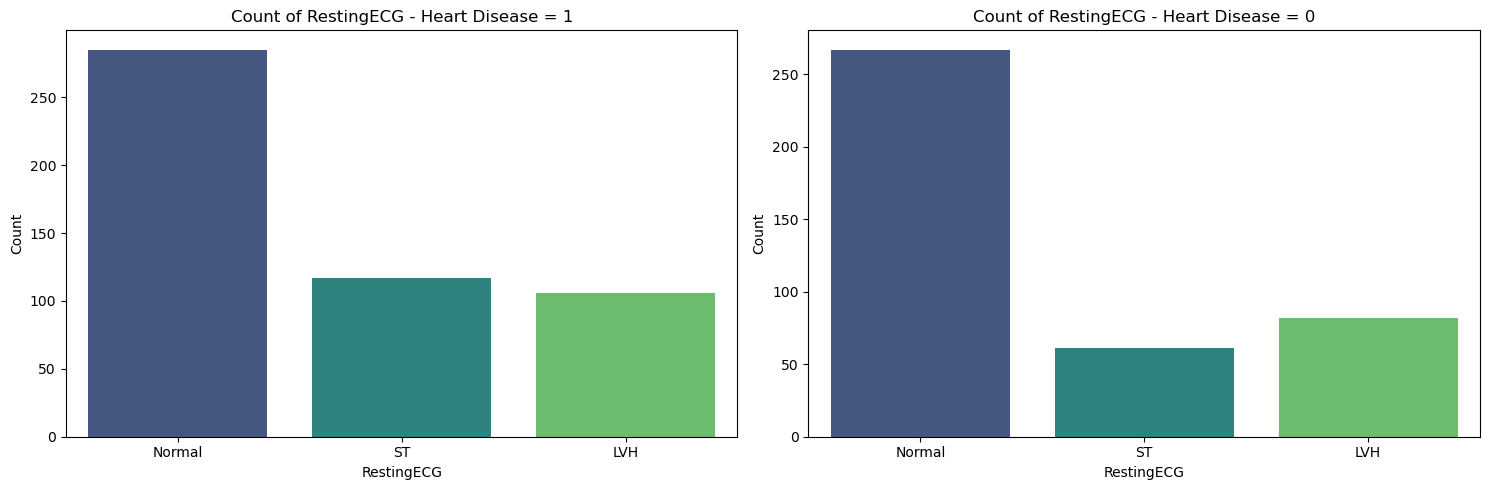

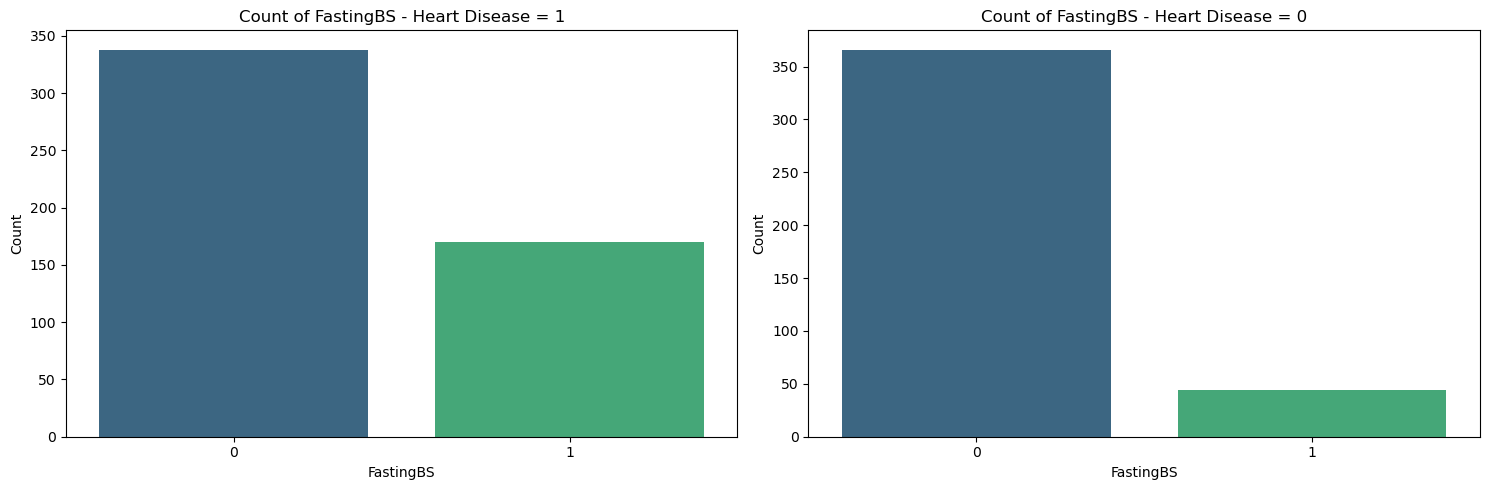

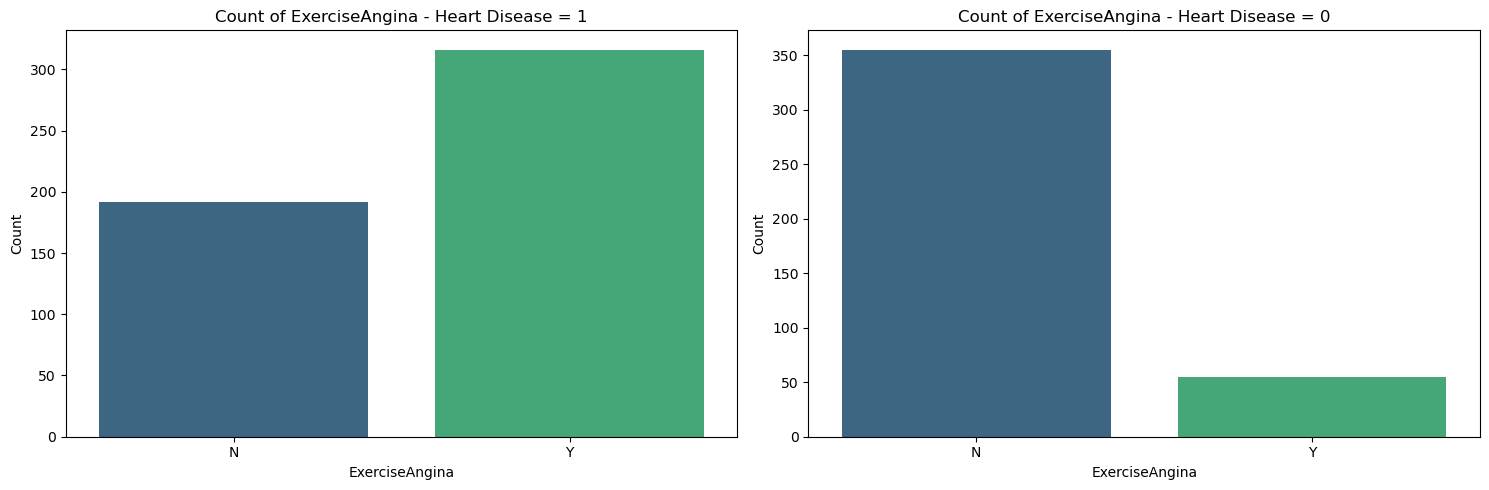

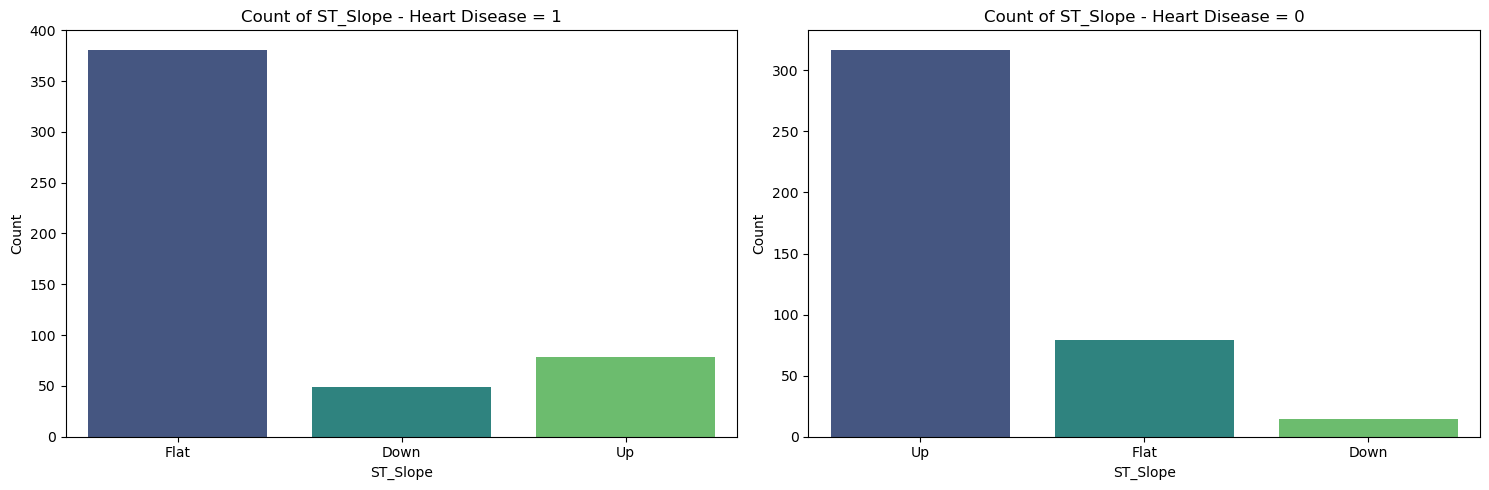

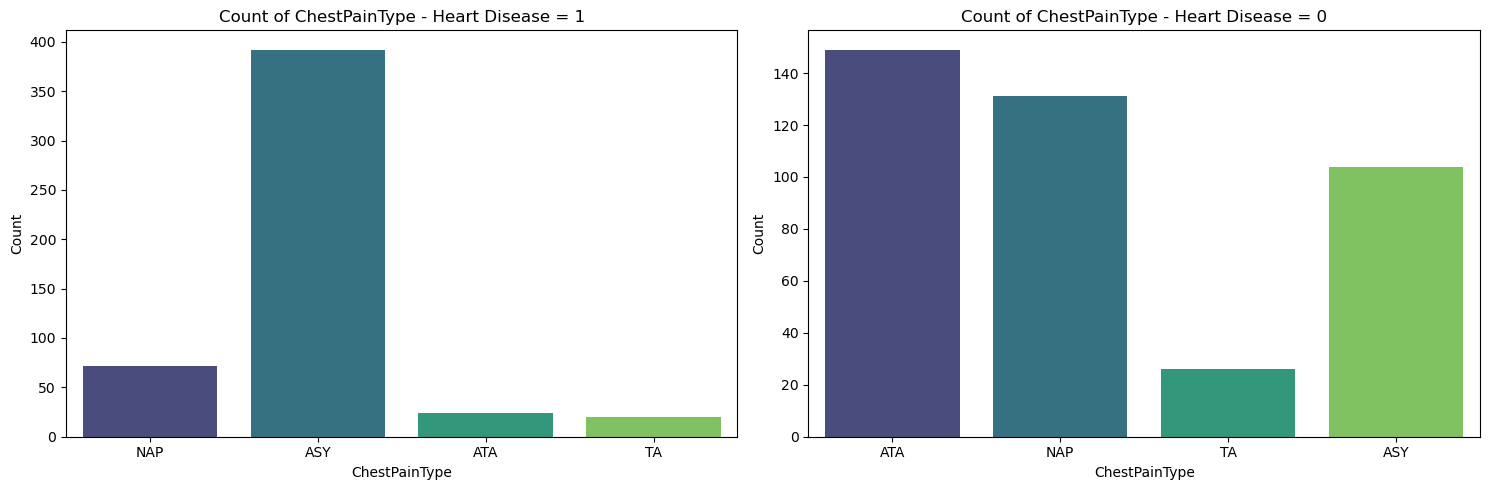

In [62]:
def plot_value_counts(df, feature):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.countplot(x=df[df['HeartDisease'] == 1][feature], ax=ax[0], palette='viridis')
    ax[0].set_title(f'Count of {feature} - Heart Disease = 1')
    ax[0].set_xlabel(feature)
    ax[0].set_ylabel('Count')

    sns.countplot(x=df[df['HeartDisease'] == 0][feature], ax=ax[1], palette='viridis')
    ax[1].set_title(f'Count of {feature} - Heart Disease = 0')
    ax[1].set_xlabel(feature)
    ax[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

features = ['RestingECG', 'FastingBS', 'ExerciseAngina', 'ST_Slope', 'ChestPainType']

for feature in features:
    plot_value_counts(df, feature)



Text(0.5, 1.0, 'Count of HeartDisease')

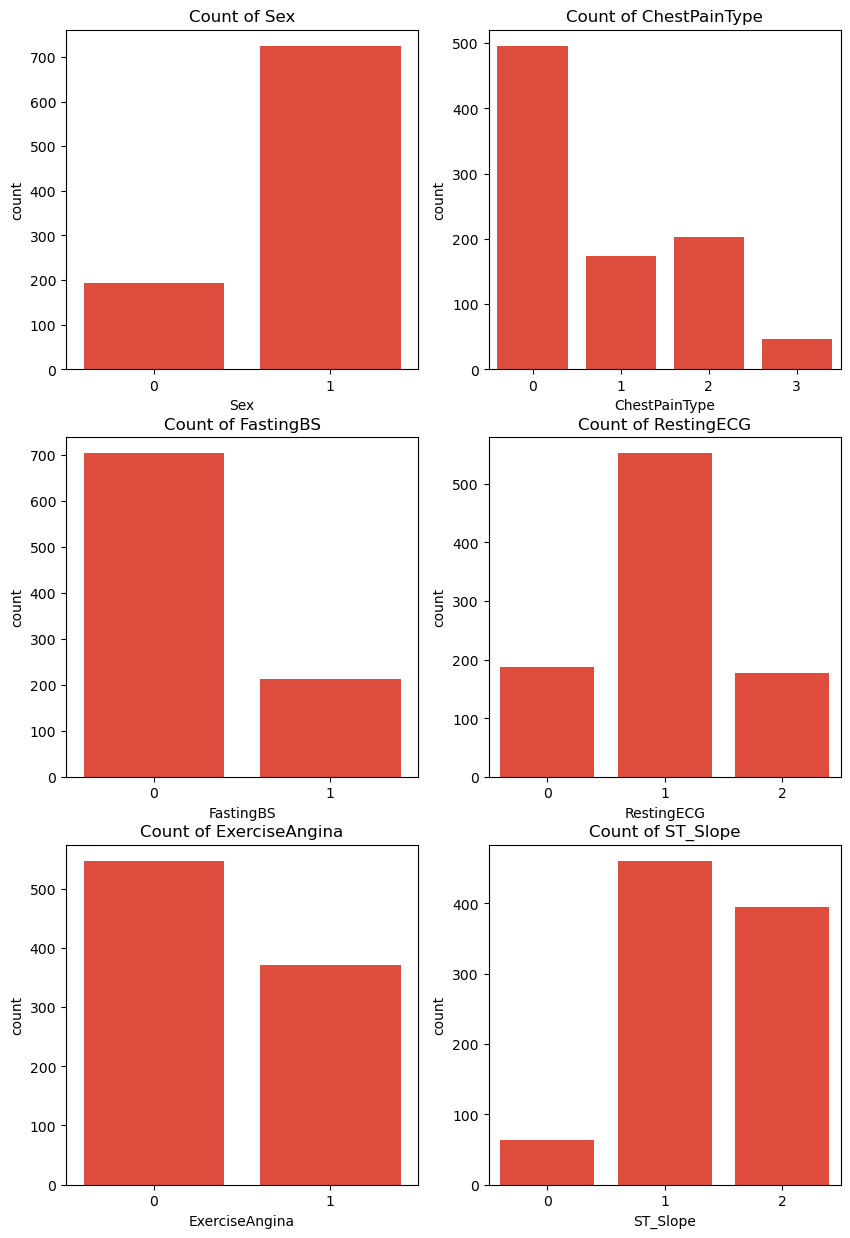

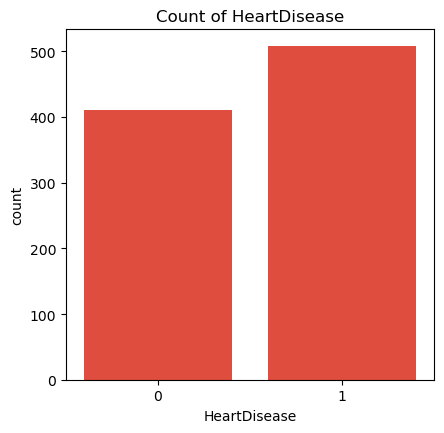

In [61]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=df1[categorical_features[i]], color=colors[0])
    title = 'Count of ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize=(4.75, 4.55))
sns.countplot(x=df1[categorical_features[len(categorical_features) - 1]], color=colors[0])
title = 'Count of ' + categorical_features[len(categorical_features) - 1]
plt.title(title)


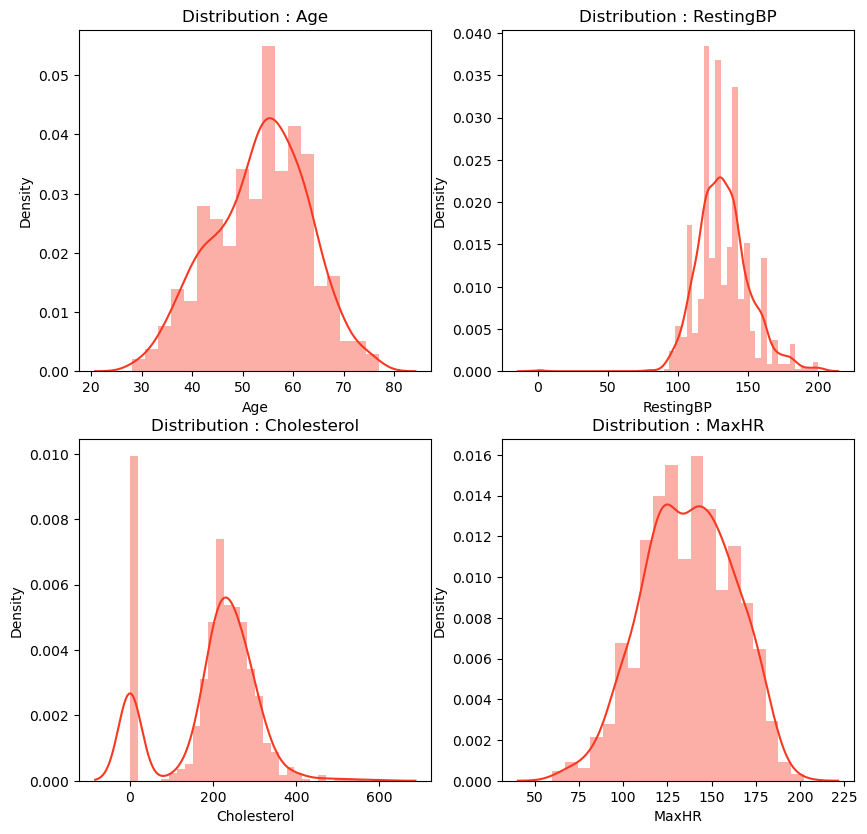

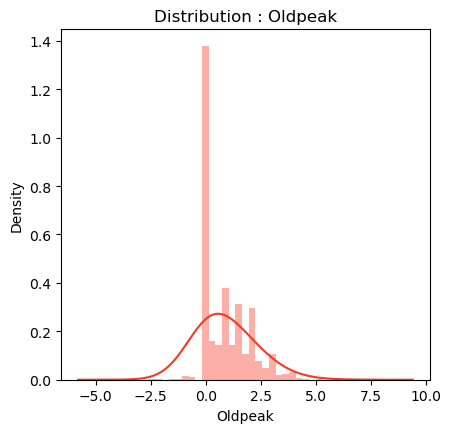

In [66]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

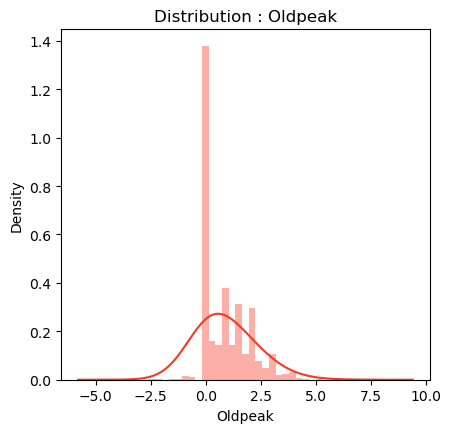

In [65]:

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

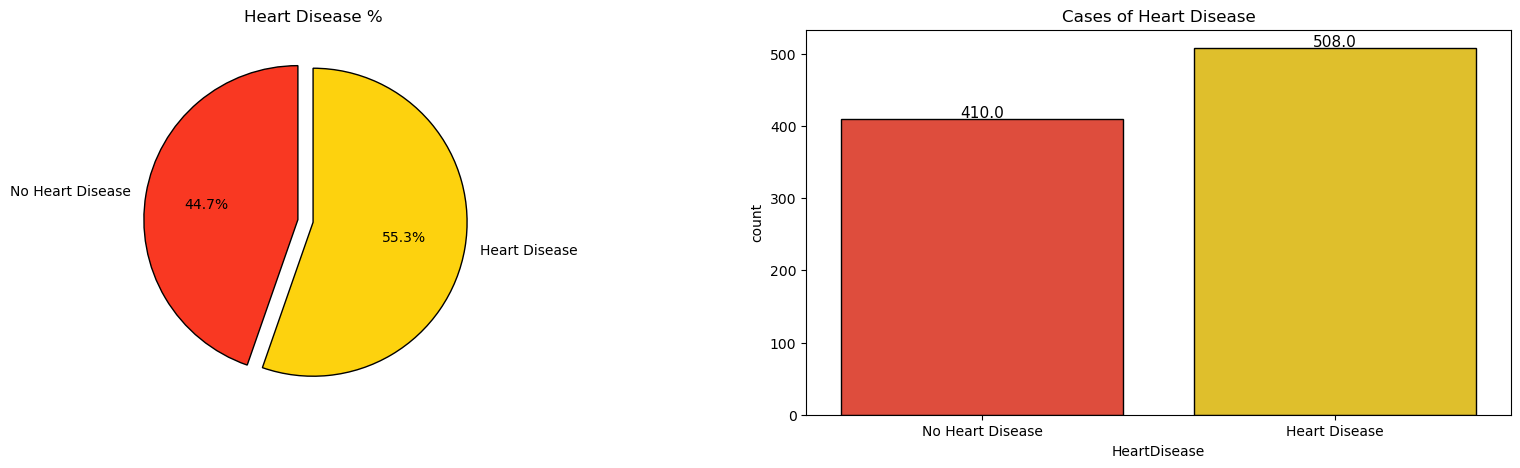

In [71]:
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot(x='HeartDisease',data = data,palette = colors,edgecolor = 'black',ax = ax[1])
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()

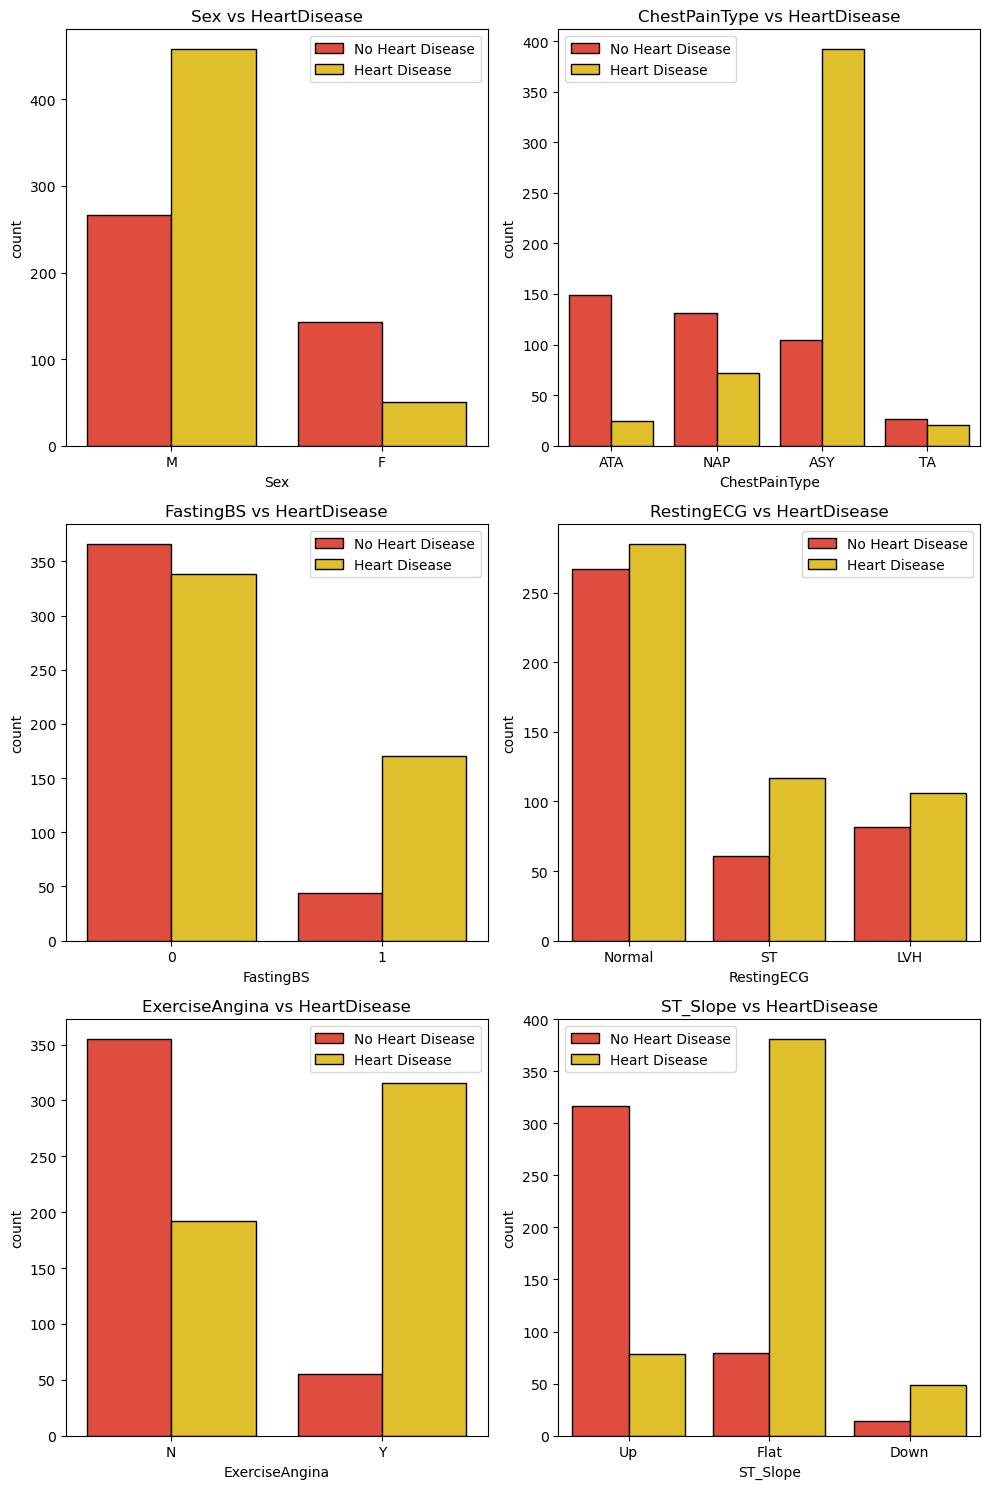

In [74]:
colors = ['#F93822', '#FDD20E']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i + 1)
    ax = sns.countplot(x=categorical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black')
    
    title = categorical_features[i] + ' vs HeartDisease'
    plt.title(title)
    plt.legend(['No Heart Disease', 'Heart Disease'])

# Adjust layout
plt.tight_layout()
plt.show()


In [79]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

# Chest Pain Type
cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp.get(0, 0) / sum(cp) * 100, cp.get(1, 0) / sum(cp) * 100, cp.get(2, 0) / sum(cp) * 100, cp.get(3, 0) / sum(cp) * 100]

# Fasting Blood Sugar 
fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs.get(0, 0) / sum(fbs) * 100, fbs.get(1, 0) / sum(fbs) * 100]

# Resting Electrocardiogram 
restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg.get(0, 0) / sum(restecg) * 100, restecg.get(1, 0) / sum(restecg) * 100, restecg.get(2, 0) / sum(restecg) * 100]

# Exercise Angina 
exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang.get(0, 0) / sum(exang) * 100, exang.get(1, 0) / sum(exang) * 100]

# ST Slope
slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope.get(0, 0) / sum(slope) * 100, slope.get(1, 0) / sum(slope) * 100, slope.get(2, 0) / sum(slope) * 100]


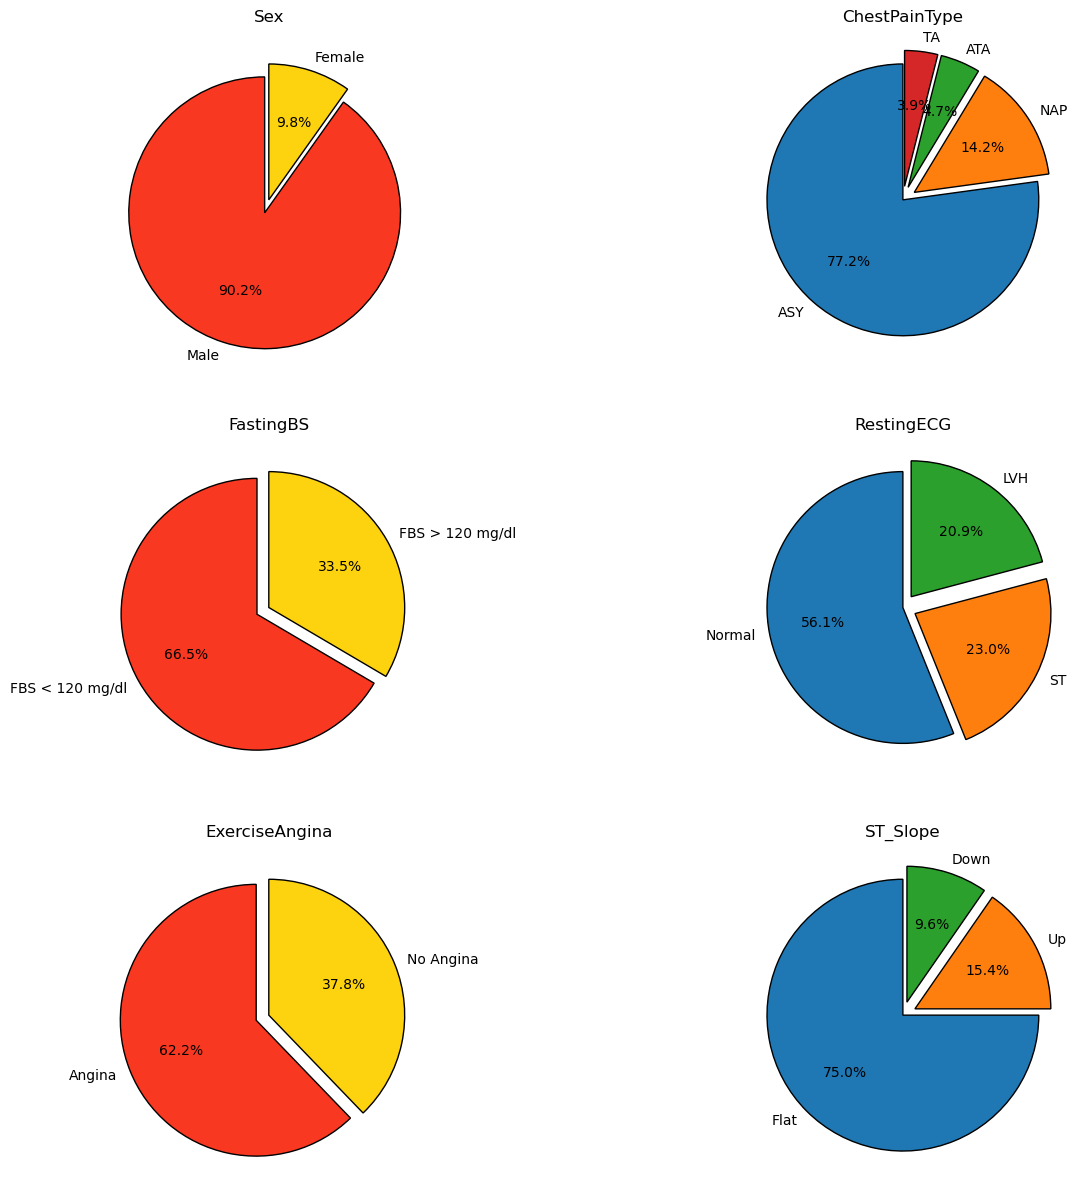

In [80]:
x,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

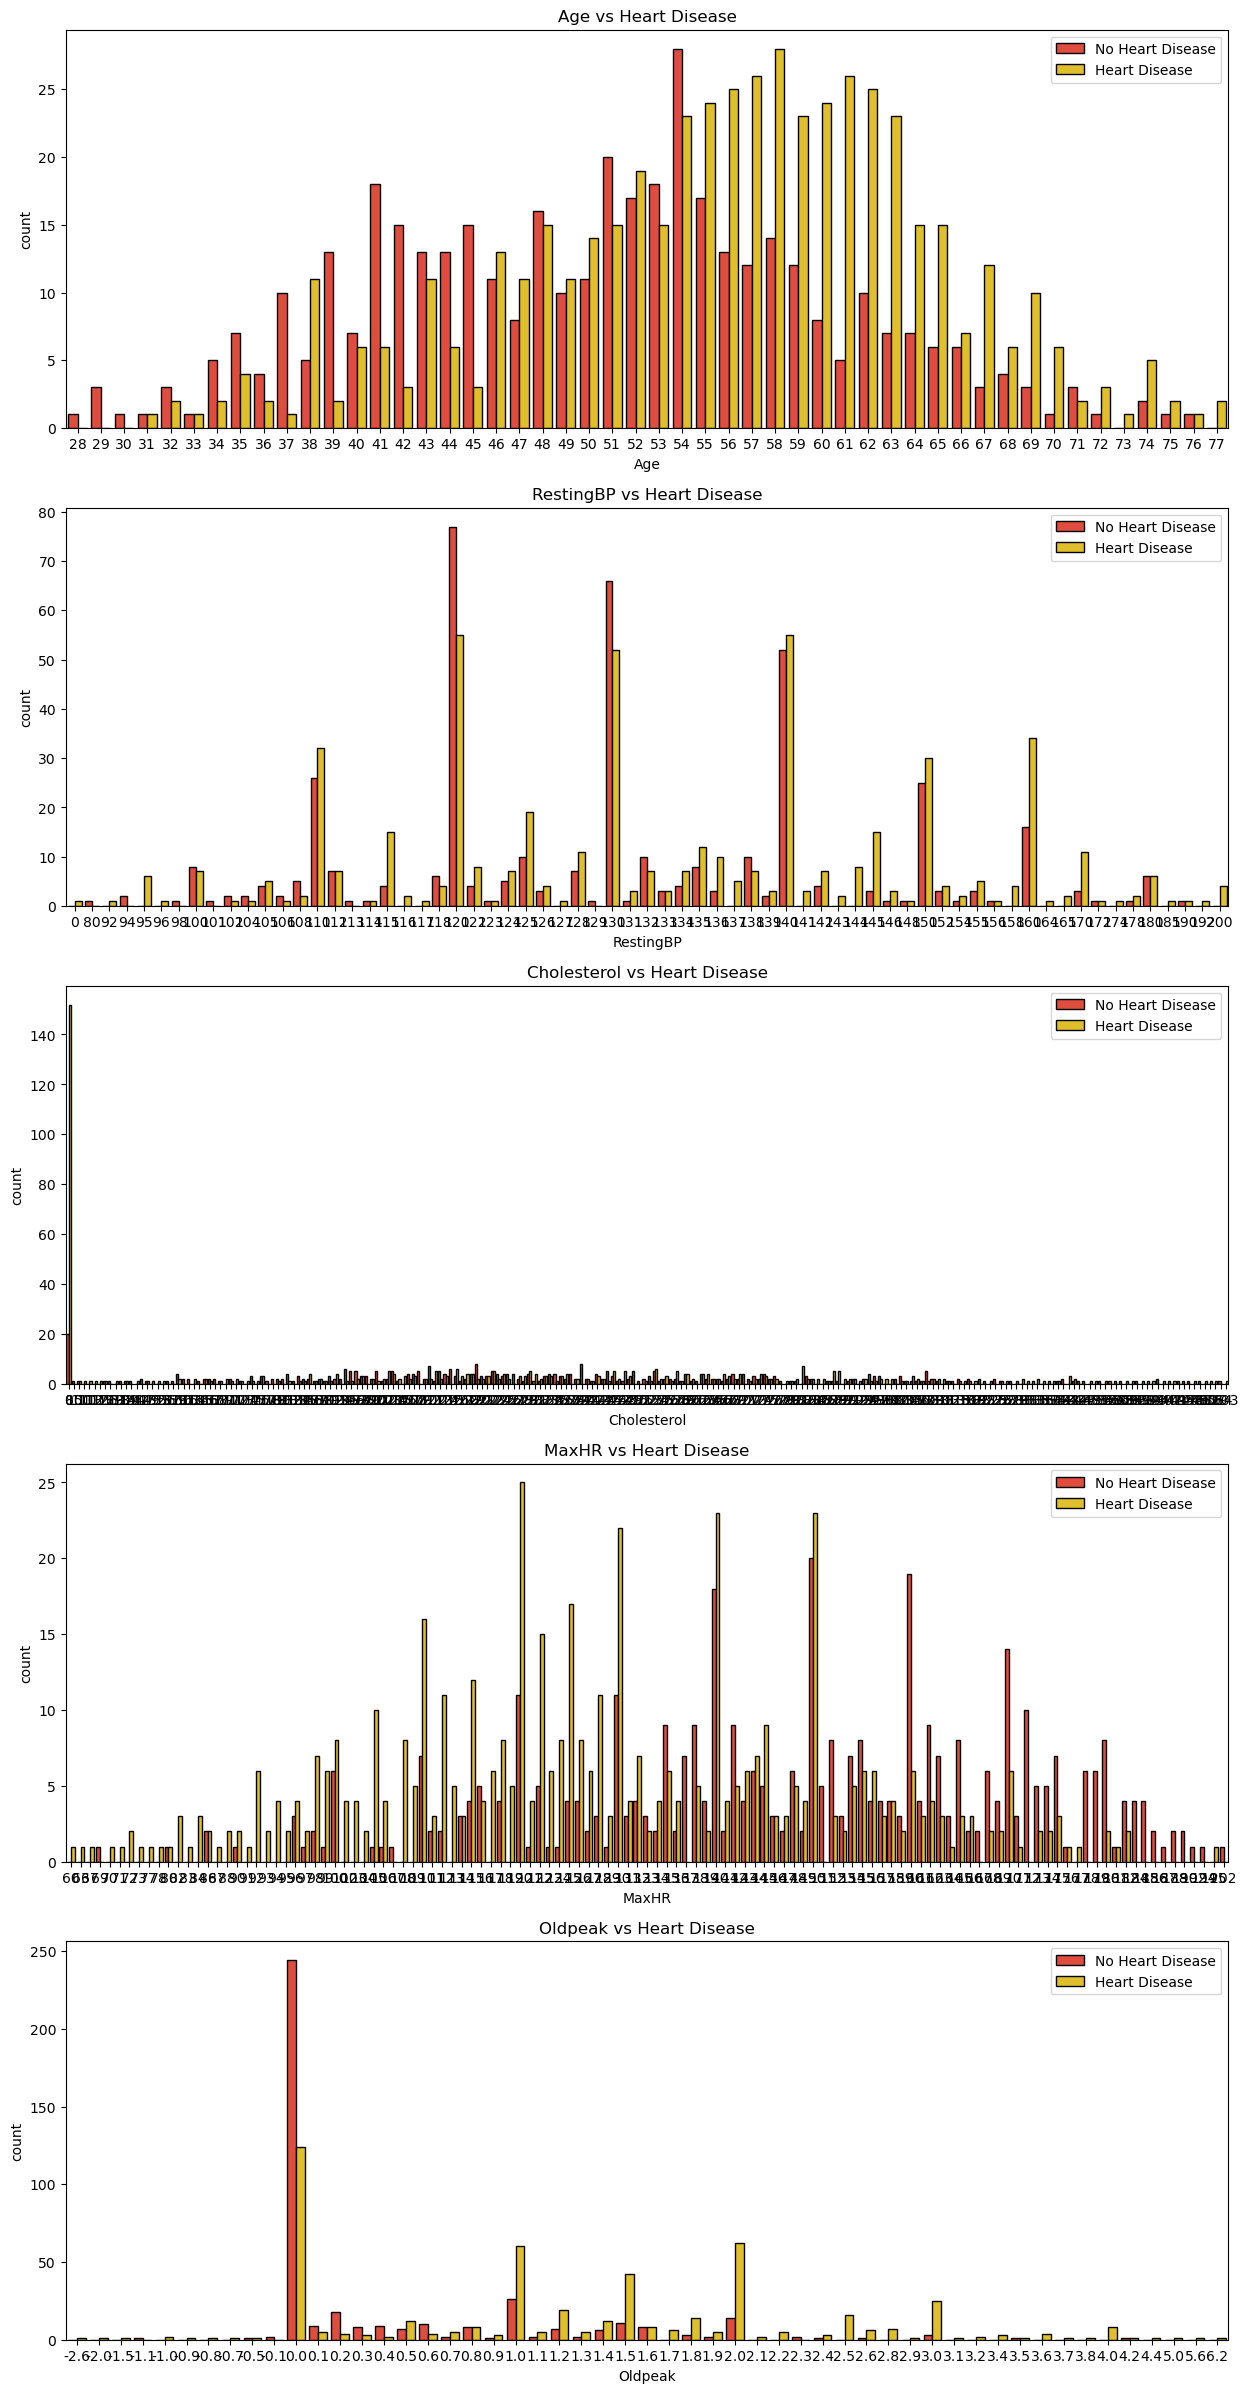

In [81]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(x=numerical_features[i],data = data,hue = "HeartDisease",palette = colors, edgecolor = 'black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

In [83]:
# Grouping the 'RestingBP' into intervals of 5
data['RestingBP_Group'] = [int(i / 5) for i in data['RestingBP']]
# Converts each value in 'RestingBP' to an integer representing its group by dividing by 5.
# For example, a 'RestingBP' value of 132 becomes 26 (132 / 5 = 26.4, rounded to 26).

# Grouping the 'Cholesterol' into intervals of 10
data['Cholesterol_Group'] = [int(i / 10) for i in data['Cholesterol']]
# Converts each value in 'Cholesterol' to an integer representing its group by dividing by 10.
# For example, a 'Cholesterol' value of 198 becomes 19 (198 / 10 = 19.8, rounded to 19).

# Grouping the 'MaxHR' into intervals of 5
data['MaxHR_Group'] = [int(i / 5) for i in data['MaxHR']]
# Converts each value in 'MaxHR' to an integer representing its group by dividing by 5.
# For example, a 'MaxHR' value of 136 becomes 27 (136 / 5 = 27.2, rounded to 27).

# Grouping the 'Oldpeak' into intervals of 0.5
data['Oldpeak_Group'] = [int((i * 10) / 5) for i in data['Oldpeak']]
# Converts each value in 'Oldpeak' to an integer representing its group by multiplying by 10, dividing by 5.
# For example, an 'Oldpeak' value of 0.89 becomes 18 (0.89 * 10 = 8.9, divided by 5 = 1.78, rounded to 18).

#it will help ua for visualization and analysis

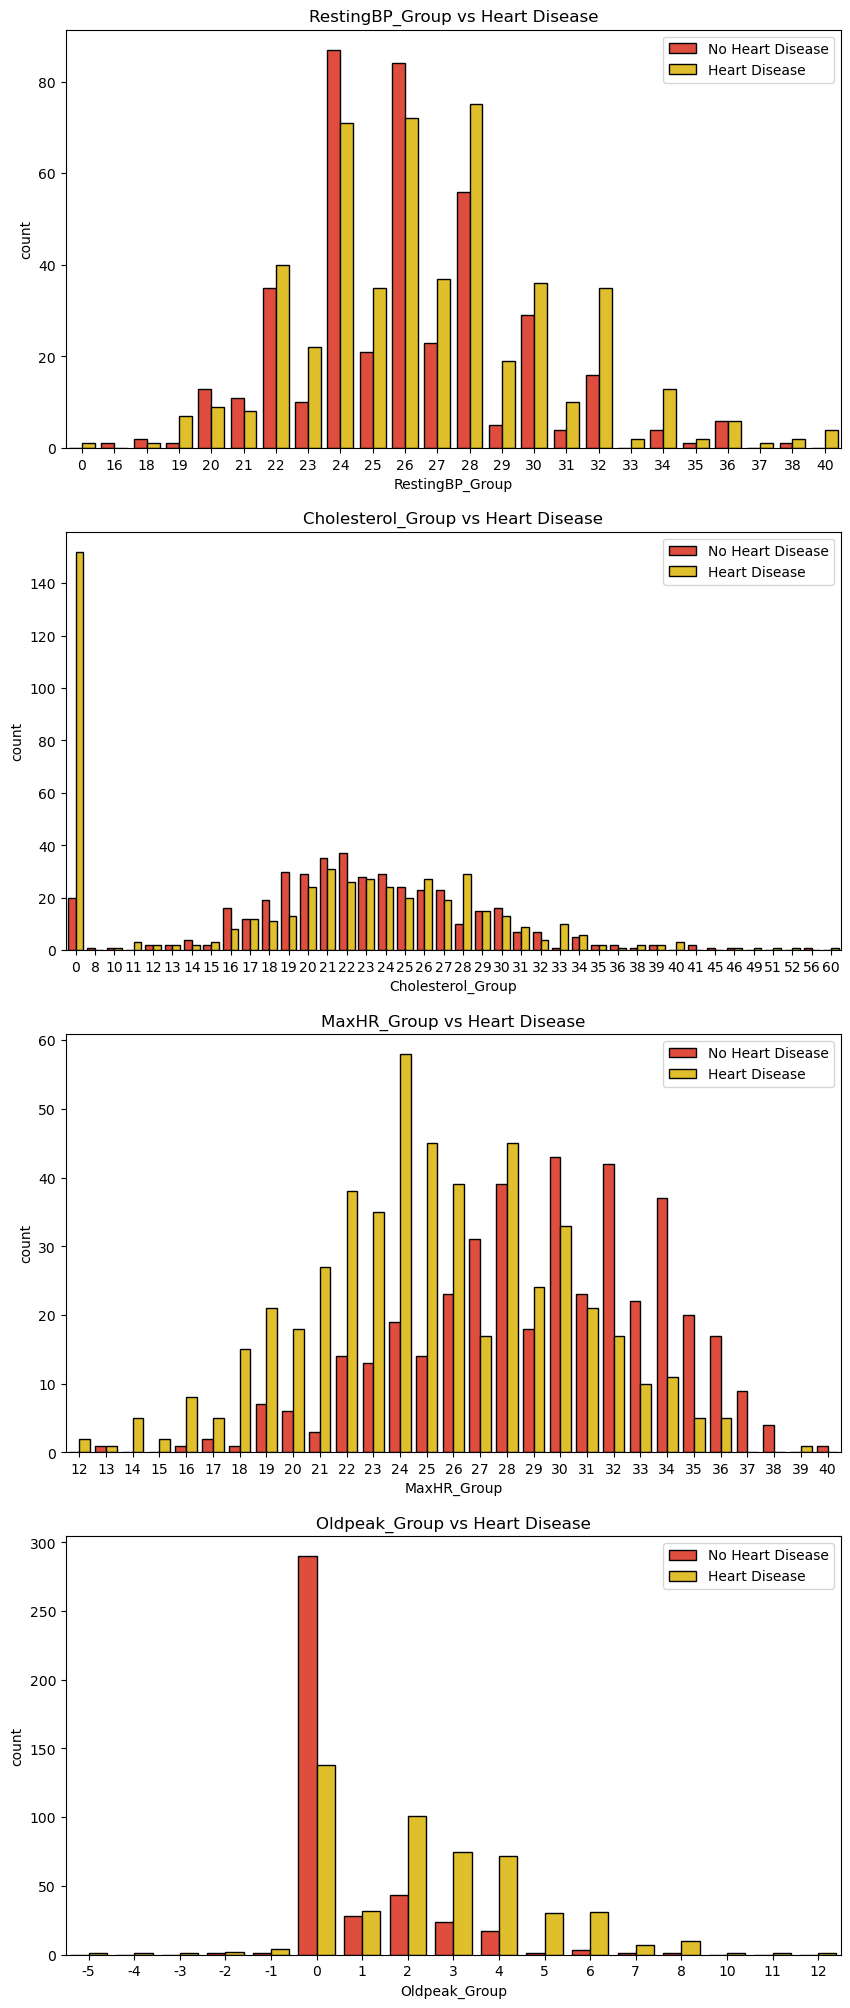

In [84]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(x=group_numerical_features[i],data = data,hue = "HeartDisease",palette = colors, edgecolor = 'black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

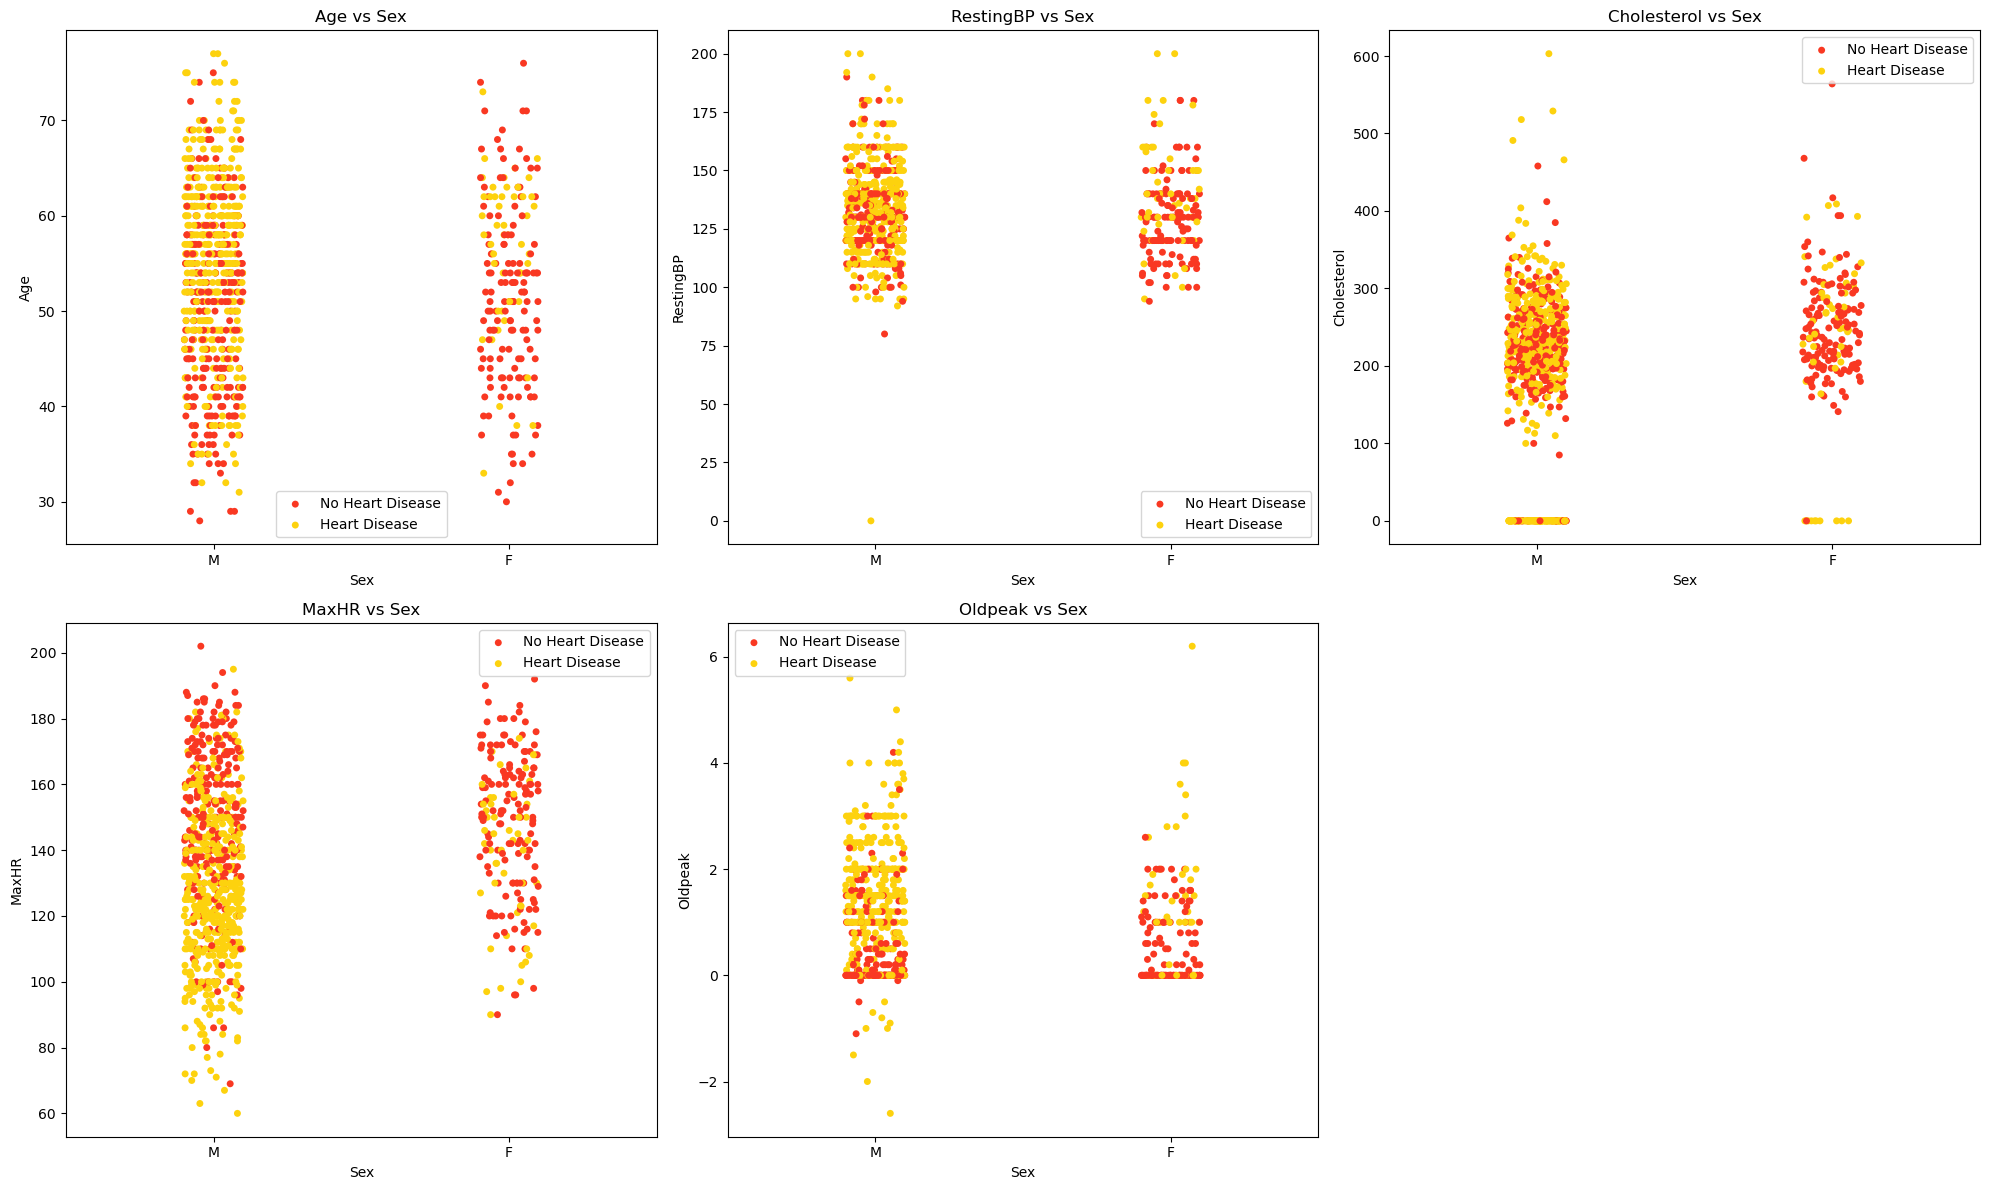

In [87]:
colors = ['#F93822', '#FDD20E']

num_features = len(numerical_features)

fig, axes = plt.subplots(
    nrows=(num_features // 3) + (num_features % 3 > 0), 
    ncols=3, 
    figsize=(20, 6 * ((num_features // 3) + (num_features % 3 > 0)))
)

axes = axes.flatten()

for i in range(num_features):
    sns.stripplot(x='Sex', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors, ax=axes[i])
    axes[i].legend(['No Heart Disease', 'Heart Disease'])
    axes[i].set_title(f'{numerical_features[i]} vs Sex', fontsize=12)
    axes[i].set_xlabel('Sex', fontsize=10)
    axes[i].set_ylabel(numerical_features[i], fontsize=10)

for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


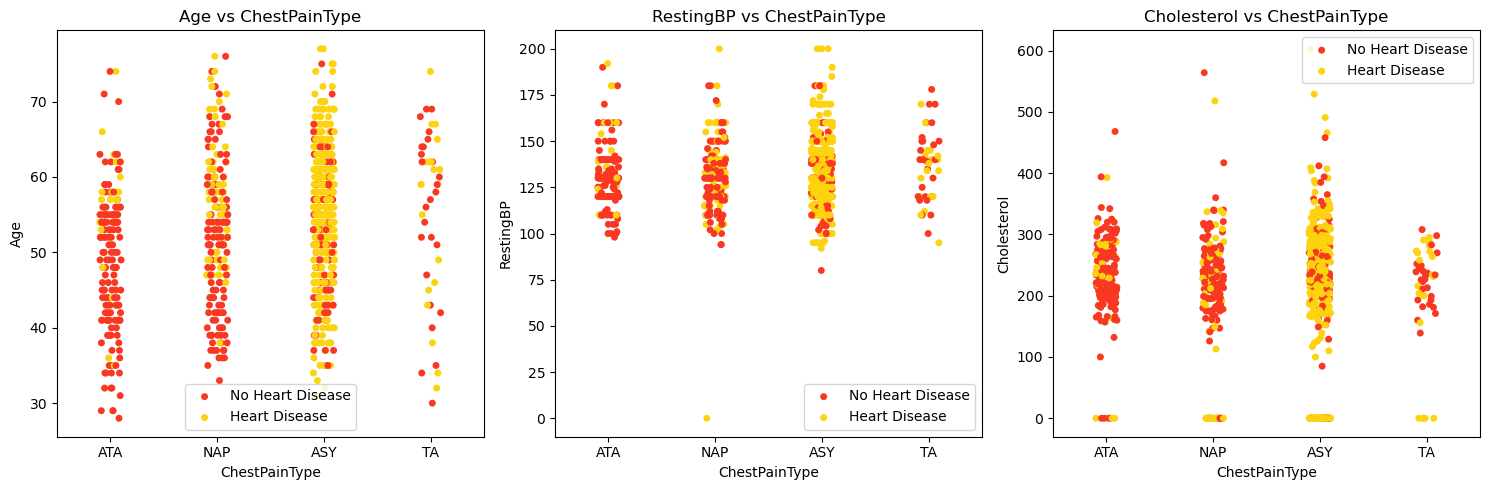

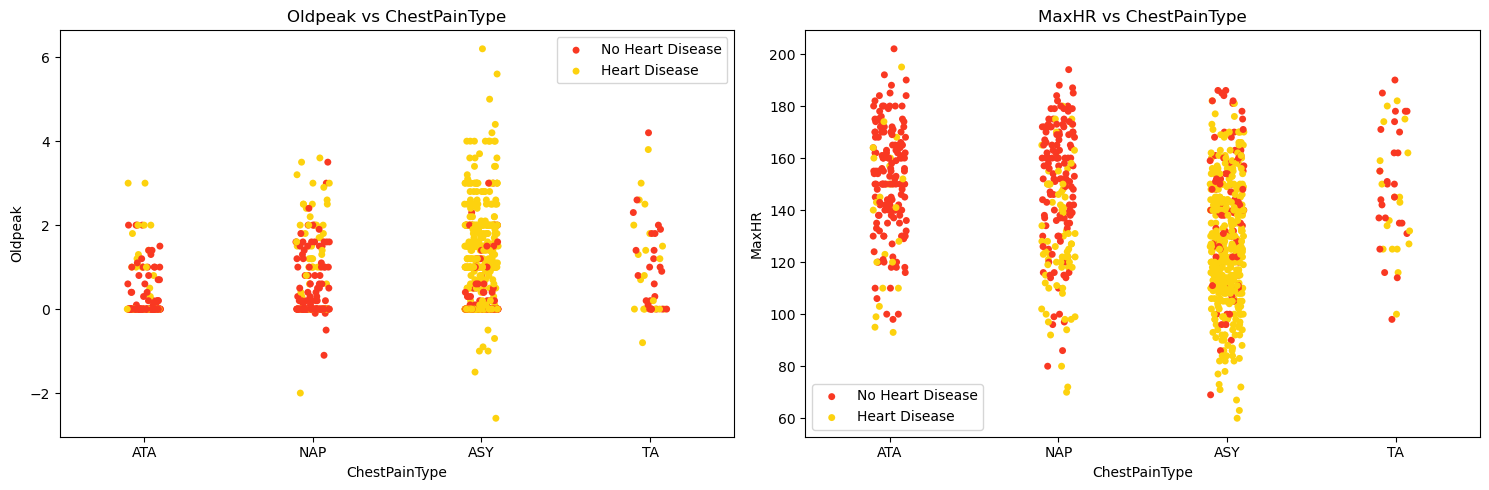

In [88]:
colors = ['#F93822', '#FDD20E']

num_features = len(numerical_features)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):
    sns.stripplot(
        x='ChestPainType',
        y=numerical_features[i],
        data=data,
        hue='HeartDisease',
        palette=colors,
        ax=axes[i]
    )
    axes[i].legend(['No Heart Disease', 'Heart Disease'])
    axes[i].set_title(f'{numerical_features[i]} vs ChestPainType')

plt.tight_layout()
plt.show()

# Create subplots for the second set of plots (last 2 numerical features)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in [-1, -2]:
    sns.stripplot(
        x='ChestPainType',
        y=numerical_features[i],
        data=data,
        hue='HeartDisease',
        palette=colors,
        ax=axes[-(i+1)]
    )
    axes[-(i+1)].legend(['No Heart Disease', 'Heart Disease'])
    axes[-(i+1)].set_title(f'{numerical_features[i]} vs ChestPainType')

plt.tight_layout()
plt.show()


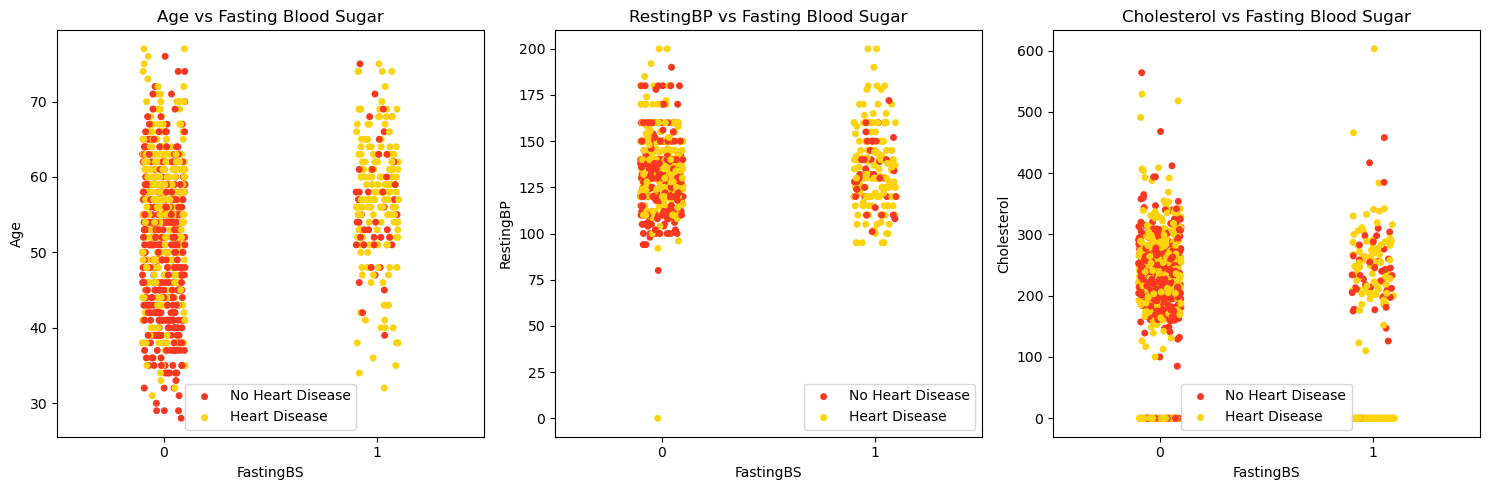

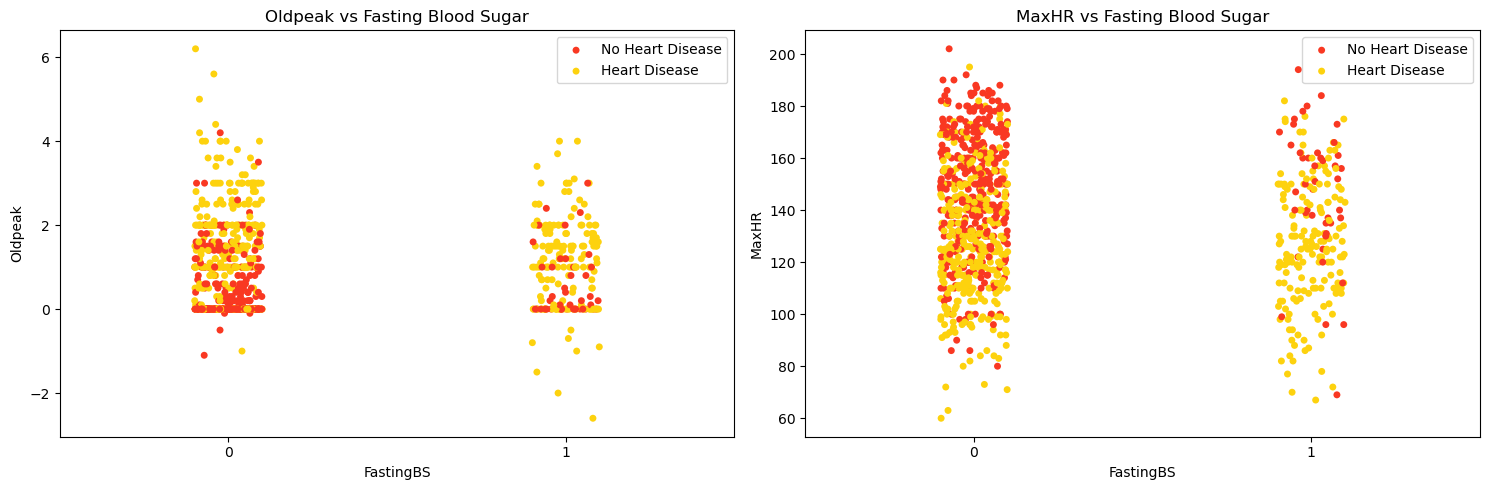

In [89]:
colors = ['#F93822', '#FDD20E']

num_features = len(numerical_features)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):
    sns.stripplot(
        x='FastingBS',
        y=numerical_features[i],
        data=data,
        hue='HeartDisease',
        palette=colors,
        ax=axes[i]
    )
    axes[i].legend(['No Heart Disease', 'Heart Disease'])
    axes[i].set_title(f'{numerical_features[i]} vs Fasting Blood Sugar')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in [-1, -2]:
    sns.stripplot(
        x='FastingBS',
        y=numerical_features[i],
        data=data,
        hue='HeartDisease',
        palette=colors,
        ax=axes[-(i+1)]
    )
    axes[-(i+1)].legend(['No Heart Disease', 'Heart Disease'])
    axes[-(i+1)].set_title(f'{numerical_features[i]} vs Fasting Blood Sugar')

plt.tight_layout()
plt.show()


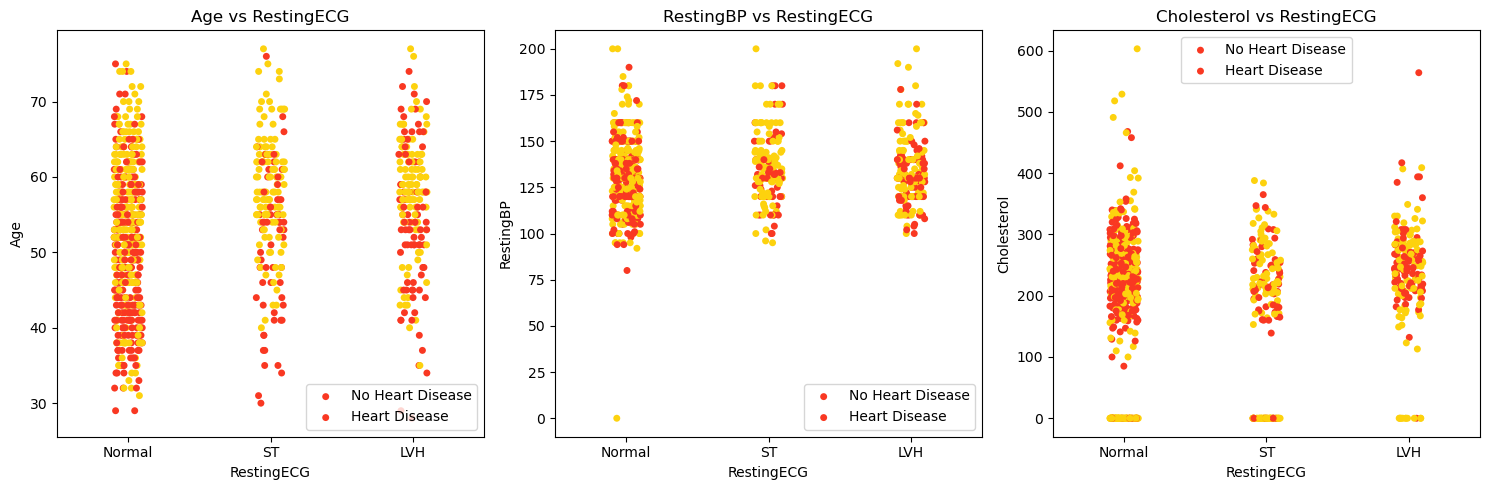

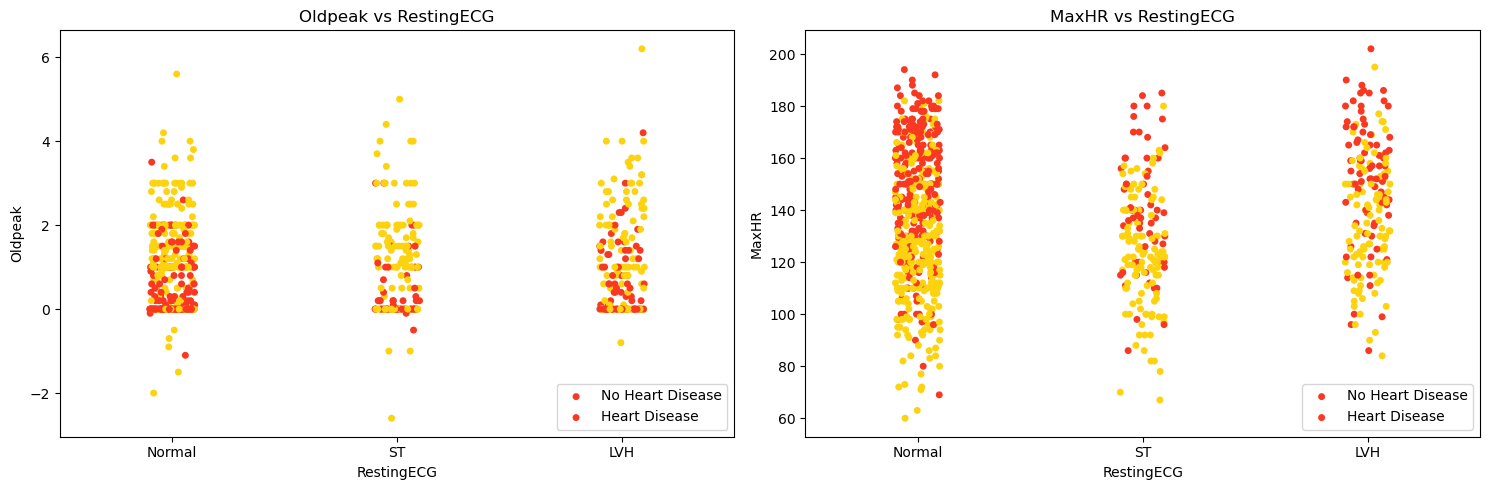

In [90]:
colors = ['#F93822', '#FDD20E']

num_features = len(numerical_features)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):
    sns.stripplot(
        x='RestingECG',
        y=numerical_features[i],
        data=data,
        hue='HeartDisease',
        palette=colors,
        ax=axes[i]
    )
    axes[i].legend(['No Heart Disease', 'Heart Disease'])
    axes[i].set_title(f'{numerical_features[i]} vs RestingECG')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in [-1, -2]:
    sns.stripplot(
        x='RestingECG',
        y=numerical_features[i],
        data=data,
        hue='HeartDisease',
        palette=colors,
        ax=axes[-(i+1)] 
    )
    axes[-(i+1)].legend(['No Heart Disease', 'Heart Disease'])
    axes[-(i+1)].set_title(f'{numerical_features[i]} vs RestingECG')

plt.tight_layout()
plt.show()


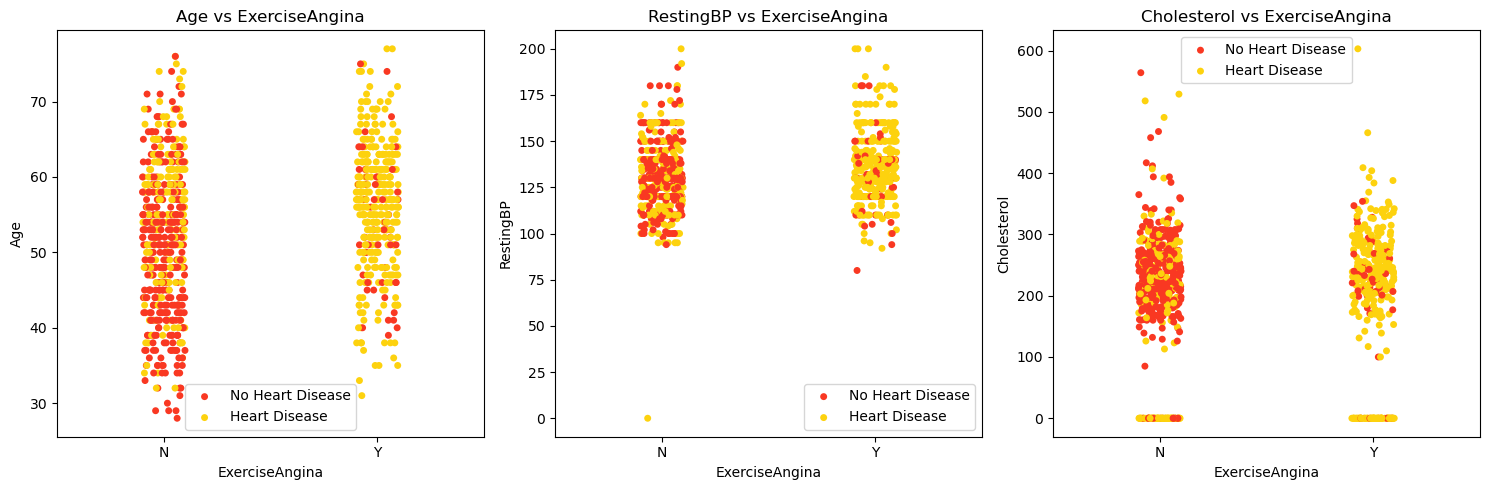

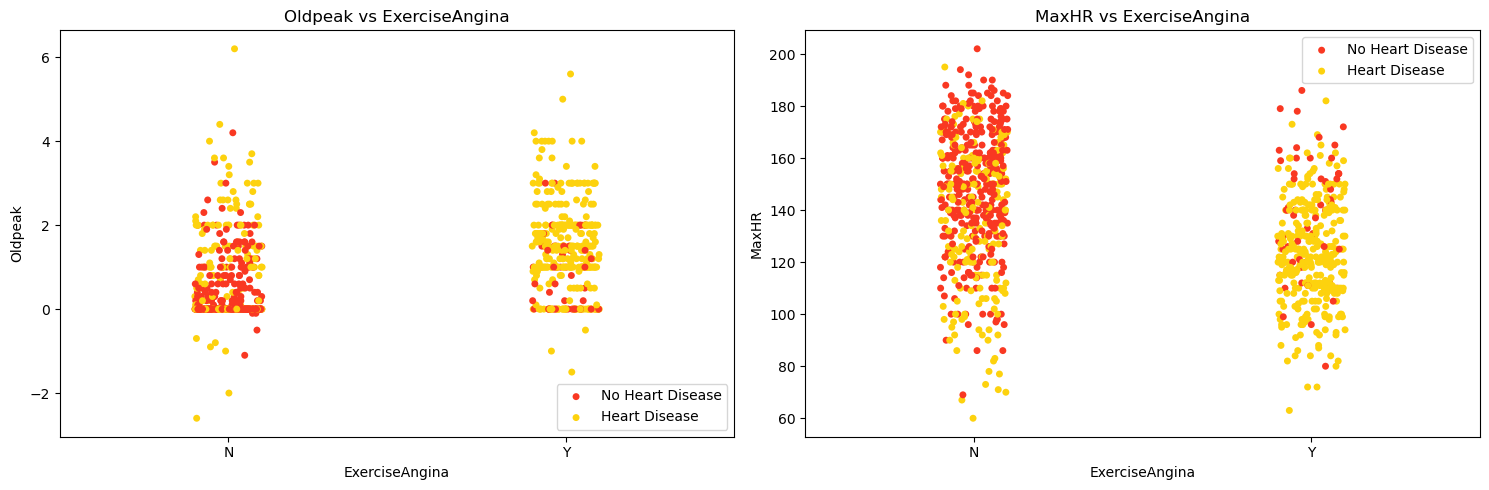

In [91]:
colors = ['#F93822', '#FDD20E']

num_features = len(numerical_features)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):
    sns.stripplot(
        x='ExerciseAngina',
        y=numerical_features[i],
        data=data,
        hue='HeartDisease',
        palette=colors,
        ax=axes[i]
    )
    axes[i].legend(['No Heart Disease', 'Heart Disease'])
    axes[i].set_title(f'{numerical_features[i]} vs ExerciseAngina')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in [-1, -2]:
    sns.stripplot(
        x='ExerciseAngina',
        y=numerical_features[i],
        data=data,
        hue='HeartDisease',
        palette=colors,
        ax=axes[-(i+1)]
    )
    axes[-(i+1)].legend(['No Heart Disease', 'Heart Disease'])
    axes[-(i+1)].set_title(f'{numerical_features[i]} vs ExerciseAngina')

plt.tight_layout()
plt.show()


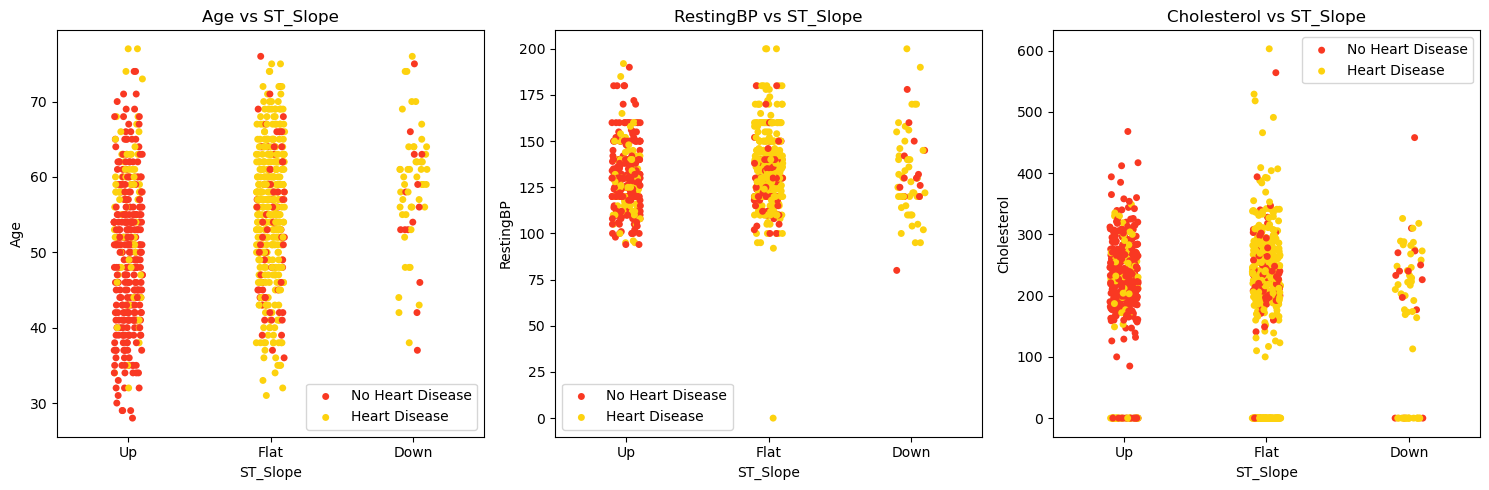

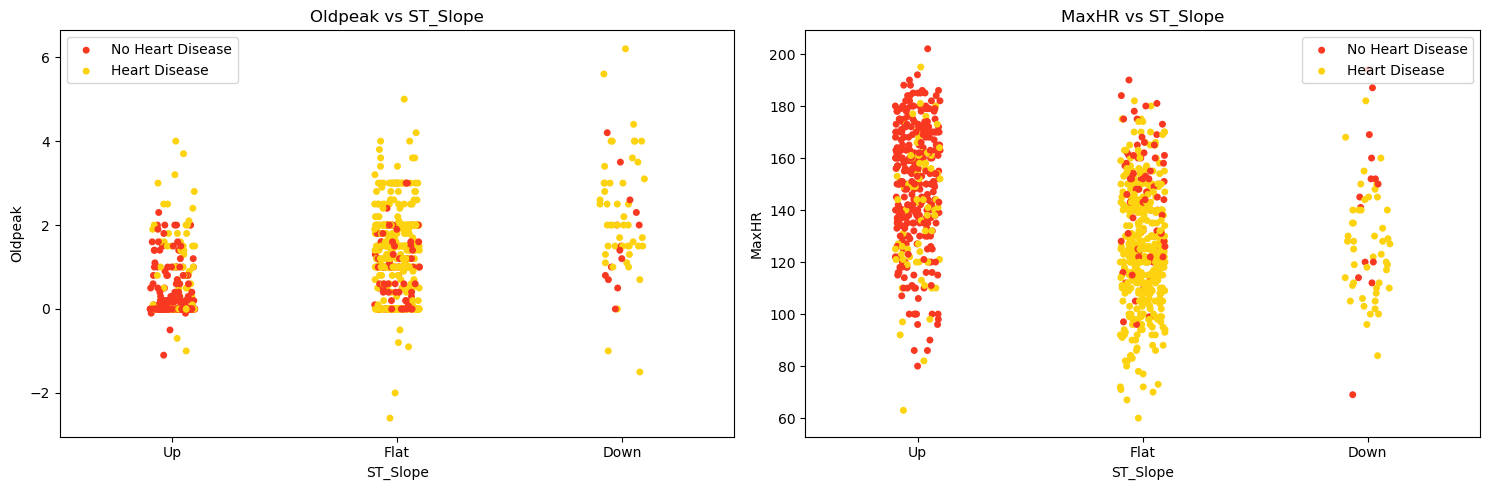

In [92]:
colors = ['#F93822', '#FDD20E']

num_features = len(numerical_features)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):
    sns.stripplot(
        x='ST_Slope',
        y=numerical_features[i],
        data=data,
        hue='HeartDisease',
        palette=colors,
        ax=axes[i]
    )
    axes[i].legend(['No Heart Disease', 'Heart Disease'])
    axes[i].set_title(f'{numerical_features[i]} vs ST_Slope')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in [-1, -2]:
    sns.stripplot(
        x='ST_Slope',
        y=numerical_features[i],
        data=data,
        hue='HeartDisease',
        palette=colors,
        ax=axes[-(i+1)] 
    )
    axes[-(i+1)].legend(['No Heart Disease', 'Heart Disease'])
    axes[-(i+1)].set_title(f'{numerical_features[i]} vs ST_Slope')

plt.tight_layout()
plt.show()


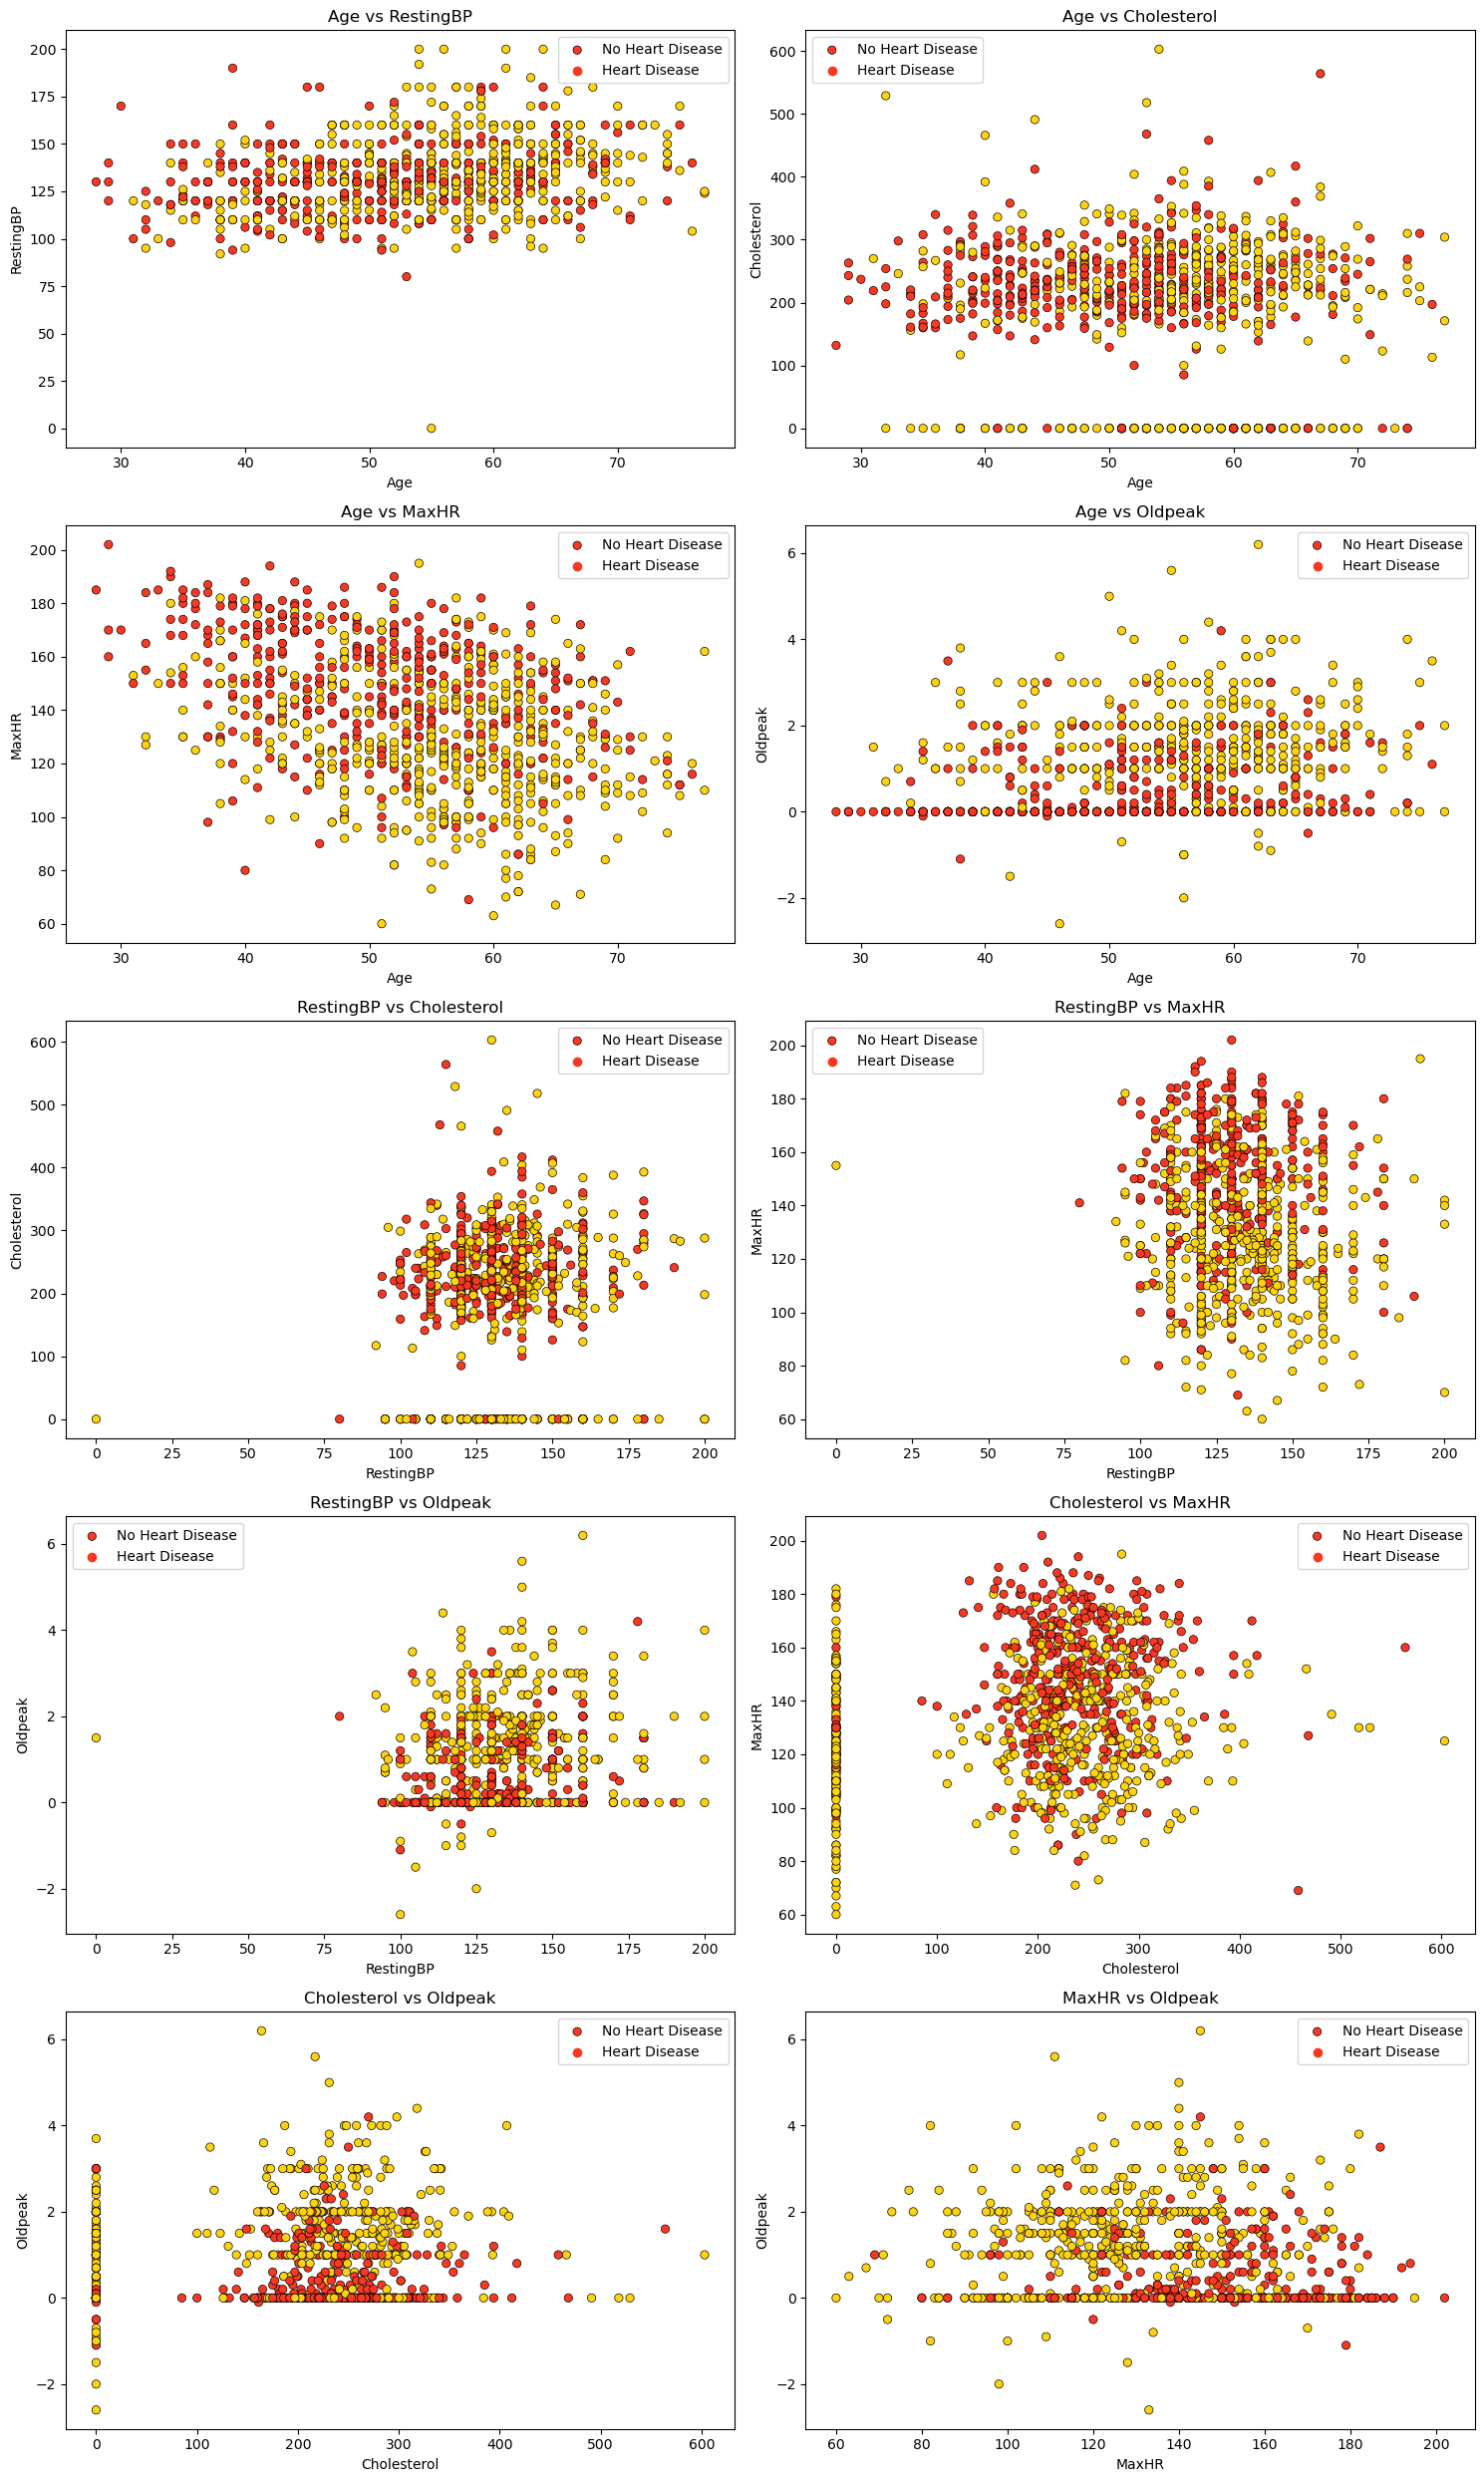

In [96]:
colors = ['#F93822', '#FDD20E']

a = 0

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5, 2, a)
            sns.scatterplot(
                x=numerical_features[i],
                y=numerical_features[j],
                data=data,
                hue='HeartDisease',
                palette=colors,
                edgecolor='black'
            )
            plt.legend(['No Heart Disease', 'Heart Disease'])
            plt.title(f'{numerical_features[i]} vs {numerical_features[j]}')

plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA) Summary

### 1. Data Overview
- **Data Shape:** The dataset comprises a total of 918 samples with 13 features.
- **Feature Types:**
  - **Categorical Features:** Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope, FastingBS
  - **Numerical Features:** Age, RestingBP, Cholesterol, MaxHR, Oldpeak

### 2. Categorical Features Analysis
- **Sex:** The distribution shows a higher proportion of males among those with heart disease compared to those without. Additionally, males with heart disease tend to have a higher MaxHR, whereas those without heart disease generally have a lower MaxHR.
- **ChestPainType:** The 'ASY' (asymptomatic) type is more commonly observed in patients with heart disease, while the 'ATA' (angina) type is more frequent among patients without heart disease. The presence of outliers in the Oldpeak feature is associated with the 'ASY' pain type in patients with heart disease.
- **RestingECG:** Patients with heart disease are more likely to have a normal RestingECG result compared to those without heart disease.
- **FastingBS:** A higher proportion of patients with heart disease have a fasting blood sugar level categorized as 0.
- **ExerciseAngina:** The presence of exercise-induced angina (Y) is significantly higher in patients with heart disease compared to those without.
- **ST_Slope:** The flat ST slope is predominantly observed in patients with heart disease, while those without heart disease are more likely to have an up-sloping ST_Slope.

### 3. Numerical Features Analysis
- **Age:** The average age of patients with heart disease is higher compared to those without, but the relationship between age and heart disease is less pronounced.
- **RestingBP:** Slightly elevated blood pressure is noted in patients with heart disease.
- **Cholesterol:** Higher cholesterol levels are observed in patients with heart disease.
- **MaxHR:** Patients with heart disease generally have a higher MaxHR, whereas those without heart disease tend to have a lower MaxHR.
- **Oldpeak:** The Oldpeak feature shows some outliers, particularly associated with the 'ASY' pain type in patients with heart disease.

### 4. Feature Distributions
- **Histograms and Distribution Plots:** The distribution of numerical features such as Age, RestingBP, Cholesterol, etc., reveals varying patterns, including potential skewness or outliers.
- **Categorical Features:** The distribution of categorical features is visualized using count plots, showing variations in categories like Sex, ChestPainType, RestingECG, etc.

### 5. Pairwise Feature Relationships
- **Scatter Plots:** Scatter plots illustrate relationships and correlations between pairs of numerical features. Observations include patterns and potential trends based on HeartDisease status. Notable patterns include higher MaxHR in males with heart disease and outliers in Oldpeak with the 'ASY' pain type.

### 6. Data Transformations
- **Feature Engineering:** Numerical features such as RestingBP, Cholesterol, MaxHR, and Oldpeak were grouped into intervals to facilitate better analysis.

### Conclusion
- **Patterns Identified:** The analysis reveals significant patterns and associations between various features and heart disease. Key observations include:
  - The prevalence of the 'ASY' pain type in patients with heart disease, regardless of age and gender.
  - Higher MaxHR in males with heart disease and lower MaxHR in those without.
  - Outliers in Oldpeak are associated with the 'ASY' pain type in patients with heart disease.
  - Exercise-induced angina (Y) is prevalent in patients with heart disease.
- **Data Quality:** The dataset appears well-suited for predictive modeling, with a balanced mix of categorical and numerical features for comprehensive analysis.


## Feature Engineering


In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler() 
ss = StandardScaler()  

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])

df1.head()


Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0 -1.43    1              1       0.41         0.83          0           1   
1 -0.48    0              2       1.49        -0.17          0           1   
2 -1.75    1              1      -0.13         0.77          0           2   
3 -0.58    0              0       0.30         0.14          0           1   
4  0.05    1              2       0.95        -0.03          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0   1.38               0     0.30         2             0  
1   0.75               0     0.41         1             1  
2  -1.53               0     0.30         2             0  
3  -1.13               1     0.47         1             1  
4  -0.58               0     0.30         2             0

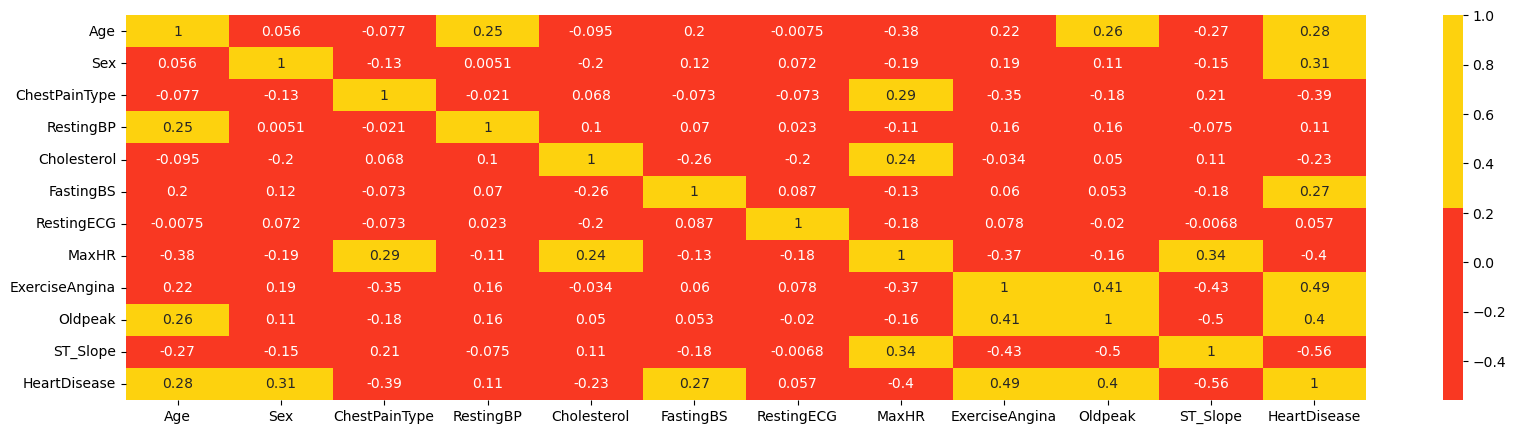

In [30]:
colors = ['#F93822', '#FDD20E']
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

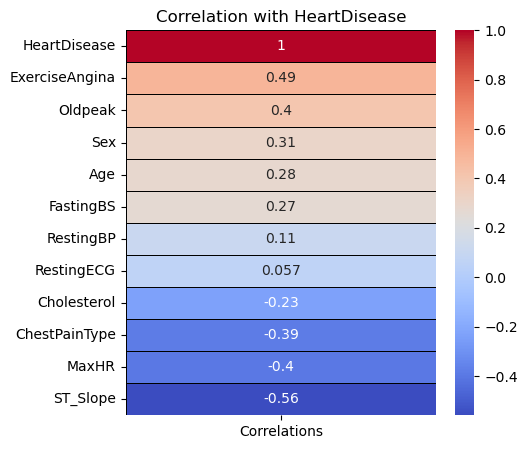

In [27]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black')
plt.title('Correlation with HeartDisease')
plt.show()

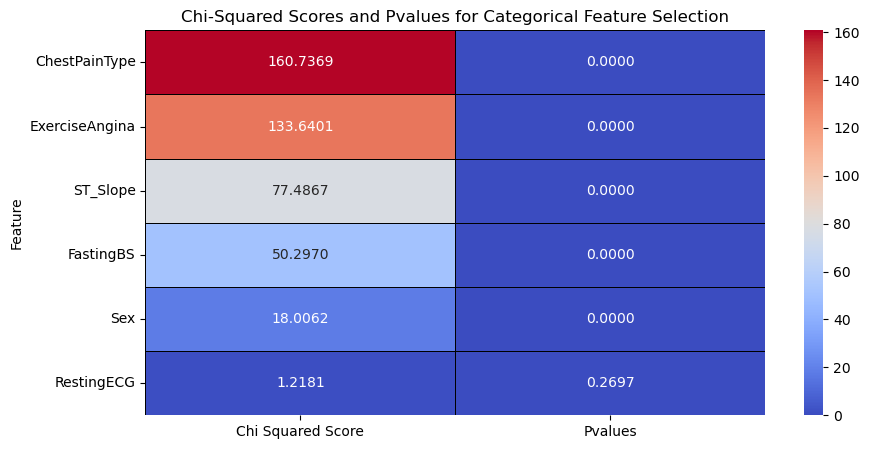

In [28]:
from sklearn.feature_selection import SelectKBest, chi2

features = df1[categorical_features[:-1]]
target = df1[categorical_features[-1]]

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Chi Squared Score': fit.scores_,
    'Pvalues': fit.pvalues_
}).sort_values(by='Chi Squared Score', ascending=False)

plt.figure(figsize=(10, 5))
sns.heatmap(feature_scores.set_index('Feature').sort_values(by='Chi Squared Score', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', fmt='.4f')
plt.title('Chi-Squared Scores and Pvalues for Categorical Feature Selection')
plt.show()


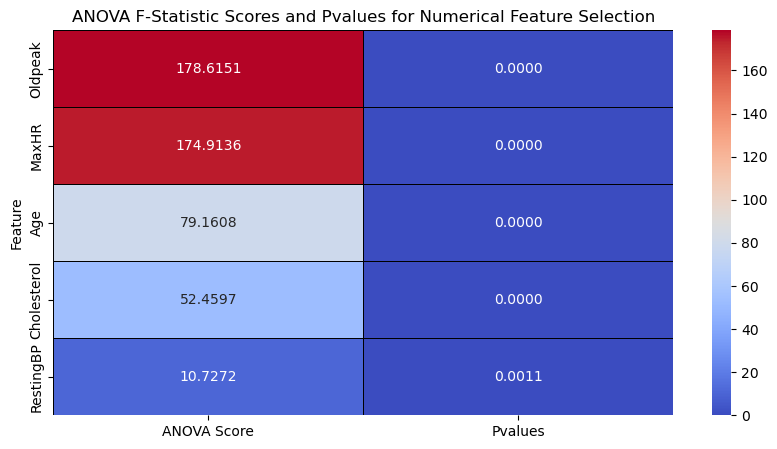

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif

features = df1[numerical_features]
target = df1[categorical_features[-1]]

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'ANOVA Score': fit.scores_,
    'Pvalues': fit.pvalues_
}).sort_values(by='ANOVA Score', ascending=False)

plt.figure(figsize=(10, 5))
sns.heatmap(feature_scores.set_index('Feature').sort_values(by='ANOVA Score', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', fmt='.4f')
plt.title('ANOVA F-Statistic Scores and Pvalues for Numerical Feature Selection')
plt.show()



# Modeling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [7]:
features = df1[df1.columns.drop(['HeartDisease', 'RestingBP', 'RestingECG'])]
target = df1['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=2)

preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), [features.columns.get_loc('Oldpeak')]),
        ('standard', StandardScaler(), [
            features.columns.get_loc('Age'),
            features.columns.get_loc('Cholesterol'),
            features.columns.get_loc('MaxHR')
        ])
    ],
    remainder='passthrough' 
)

# Create the pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

x_train_transformed = pipeline.fit_transform(x_train)

x_test_transformed = pipeline.transform(x_test)


In [107]:
def model(classifier):
    """
    Trains and evaluates a classifier, printing accuracy, cross-validation score, and ROC AUC score.
    Also plots the ROC curve.
    """
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    print("Accuracy : ", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score : ", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score : ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):
    """
    Evaluates the classifier using confusion matrix and classification report.
    """
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    sns.heatmap(cm, annot=labels, cmap=colors, fmt='')
    print(classification_report(y_test, classifier.predict(x_test)))


In [8]:
def model(classifier):
    """
    Trains and evaluates a classifier, printing accuracy, cross-validation score, and ROC AUC score.
    Also plots the ROC curve.
    """
    classifier.fit(x_train_transformed, y_train)
    prediction = classifier.predict(x_test_transformed)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    print("Accuracy : ", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score : ", '{0:.2%}'.format(cross_val_score(classifier, x_train_transformed, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score : ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    
    RocCurveDisplay.from_estimator(classifier, x_test_transformed, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):
    """
    Evaluates the classifier using confusion matrix and classification report.
    """
    cm = confusion_matrix(y_test, classifier.predict(x_test_transformed))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    sns.heatmap(cm, annot=labels, cmap=colors, fmt='')
    print(classification_report(y_test, classifier.predict(x_test_transformed)))


## Logistic Regression

Accuracy :  87.50%
Cross Validation Score :  91.11%
ROC_AUC Score :  87.43%


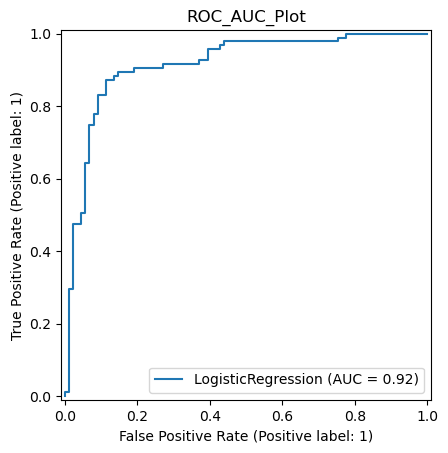

In [39]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



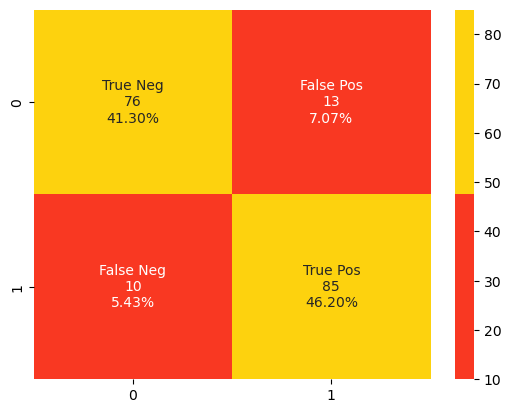

In [110]:
model_evaluation(classifier_lr)

## SVM


Accuracy :  87.50%
Cross Validation Score :  90.53%
ROC_AUC Score :  87.43%


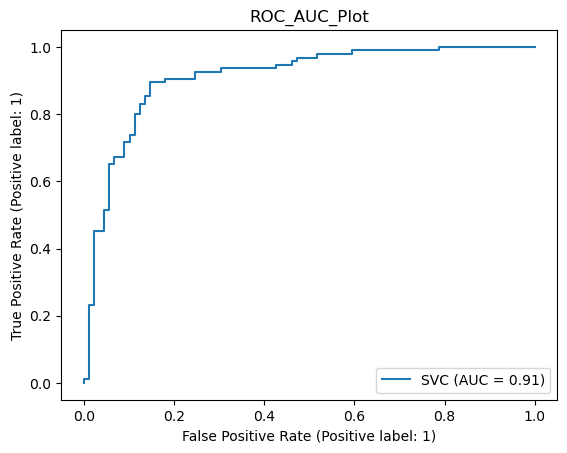

In [111]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear',C = 0.1)
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



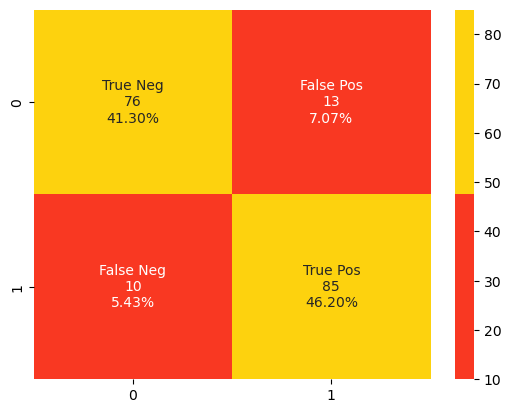

In [112]:
model_evaluation(classifier_svc)

## Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy :  84.78%
Cross Validation Score :  89.09%
ROC_AUC Score :  84.62%


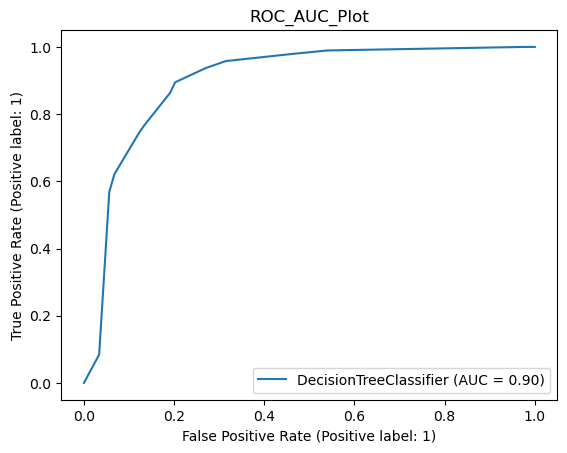

In [115]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



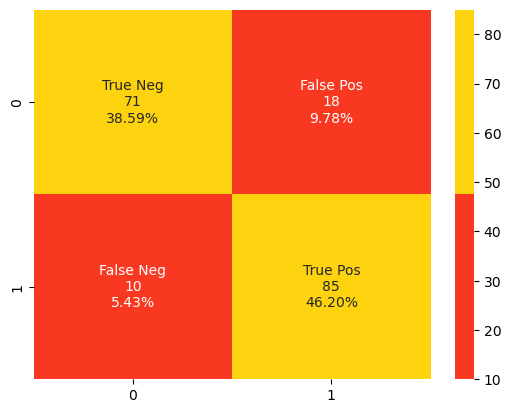

In [116]:
model_evaluation(classifier_dt)

## KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy :  81.52%
Cross Validation Score :  89.34%
ROC_AUC Score :  81.36%


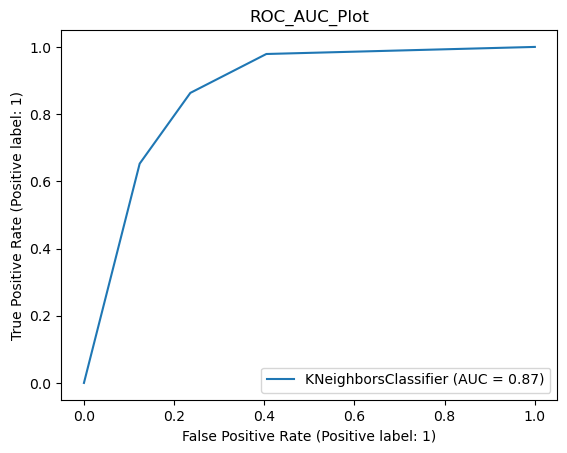

In [119]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        89
           1       0.80      0.86      0.83        95

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



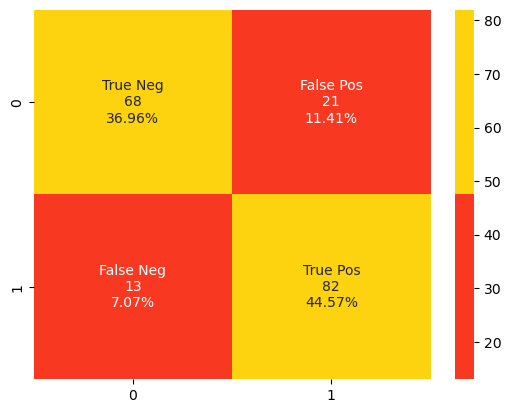

In [120]:
model_evaluation(classifier_knn)

## Apply Grid SearchCV for Finding Best Parameter 

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear'] 
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10], 
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] 
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100], # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
}

classifier_lr = LogisticRegression(random_state=0)
classifier_knn = KNeighborsClassifier()
classifier_svm = SVC(random_state=0)
classifier_dt = DecisionTreeClassifier(random_state=0)

grid_search_lr = GridSearchCV(estimator=classifier_lr, param_grid=param_grid_lr, cv=5, scoring='roc_auc')
grid_search_knn = GridSearchCV(estimator=classifier_knn, param_grid=param_grid_knn, cv=5, scoring='roc_auc')
grid_search_svm = GridSearchCV(estimator=classifier_svm, param_grid=param_grid_svm, cv=5, scoring='roc_auc')
grid_search_dt = GridSearchCV(estimator=classifier_dt, param_grid=param_grid_dt, cv=5, scoring='roc_auc')

grid_search_lr.fit(x_train_transformed, y_train)
grid_search_knn.fit(x_train_transformed, y_train)
grid_search_svm.fit(x_train_transformed, y_train)
grid_search_dt.fit(x_train_transformed, y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best ROC AUC score for Logistic Regression:", grid_search_lr.best_score_)

print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best ROC AUC score for KNN:", grid_search_knn.best_score_)

print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best ROC AUC score for SVM:", grid_search_svm.best_score_)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best ROC AUC score for Decision Tree:", grid_search_dt.best_score_)


Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC score for Logistic Regression: 0.9110724346730261
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Best ROC AUC score for KNN: 0.9092711041162775
Best parameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best ROC AUC score for SVM: 0.9163175803589592
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best ROC AUC score for Decision Tree: 0.8816039368543592


### Cross Validation with Best Parameters

In [10]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

X = features
y = target 

log_reg = LogisticRegression(C=10, penalty='l2', solver='liblinear')
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=7, weights='distance')
svm = SVC(C=1, gamma='auto', kernel='rbf', probability=True)
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=4, min_samples_split=2)

models = {
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knn,
    'Support Vector Machine': svm,
    'Decision Tree': decision_tree
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

for model_name, model in models.items():
    scores = cross_val_score(model,X,y, cv=skf, scoring=roc_auc_scorer)
    print(f'{model_name} - Mean ROC AUC: {np.mean(scores):.4f}, Std Dev: {np.std(scores):.4f}')


Logistic Regression - Mean ROC AUC: 0.9126, Std Dev: 0.0304
K-Nearest Neighbors - Mean ROC AUC: 0.7581, Std Dev: 0.0334
Support Vector Machine - Mean ROC AUC: 0.6919, Std Dev: 0.0435
Decision Tree - Mean ROC AUC: 0.8629, Std Dev: 0.0451


In [14]:
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer
import xgboost as xgb

X = features
y = target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring=roc_auc_scorer, cv=skf, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best parameters for XGBoost: {best_params}')
print(f'Best ROC AUC score for XGBoost: {best_score:.4f}')

best_xgboost_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
cross_val_scores = cross_val_score(best_xgboost_model, X, y, cv=skf, scoring=roc_auc_scorer)

print(f'XGBoost - Mean ROC AUC: {np.mean(cross_val_scores):.4f}, Std Dev: {np.std(cross_val_scores):.4f}')

best_xgboost_model.fit(X_train, y_train)

y_train_pred = best_xgboost_model.predict_proba(X_train)[:, 1]
y_val_pred = best_xgboost_model.predict_proba(X_val)[:, 1]

train_roc_auc = roc_auc_score(y_train, y_train_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred)

train_accuracy = accuracy_score(y_train, best_xgboost_model.predict(X_train))
val_accuracy = accuracy_score(y_val, best_xgboost_model.predict(X_val))

print(f'Training ROC AUC: {train_roc_auc:.4f}')
print(f'Validation ROC AUC: {val_roc_auc:.4f}')
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

if train_roc_auc > val_roc_auc + 0.05:
    print("The model is likely overfitting.")
else:
    print("The model does not appear to be overfitting.")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Best ROC AUC score for XGBoost: 0.9351
XGBoost - Mean ROC AUC: 0.9288, Std Dev: 0.0168
Training ROC AUC: 0.9881
Validation ROC AUC: 0.9216
Training Accuracy: 0.9469
Validation Accuracy: 0.8696
The model is likely overfitting.


In [15]:
# Determine if the model is overfitting
if train_roc_auc > val_roc_auc + 0.05: 
    print("The model is likely overfitting.")
else:
    print("The model does not appear to be overfitting.")

The model is likely overfitting.


In [10]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 919.0 kB/s eta 0:02:16
   ---------------------------------------- 0.3/124.9 MB 2.5 MB/s eta 0:00:50
   ---------------------------------------- 0.8/124.9 MB 4.8 MB/s eta 0:00:27
   ---------------------------------------- 1.0/124.9 MB 4.6 MB/s eta 0:00:28
   ---------------------------------------- 1.2/124.9 MB 4.4 MB/s eta 0:00:28
   ---------------------------------------- 1.3/124.9 MB 4.5 MB/s eta 0:00:28
   ---------------------------------------- 1.3/124.9 MB 4.5 MB/s eta 0:00:28
   ---------------------------------------- 1.3/124.9 MB 4.5 MB/s eta 0:00:28
    --------------------------------------- 1.9/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 2.1/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 2.3/124.9 MB 4.2 MB/s eta 0:00:3

In [16]:
# Update the maxdepth and n estimatior for solve the overfit problem
param_grid = {
    'n_estimators': [30, 40],
    'max_depth': [3, 4],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring=roc_auc_scorer, cv=skf, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best parameters for XGBoost: {best_params}')
print(f'Best ROC AUC score for XGBoost: {best_score:.4f}')

best_xgboost_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
cross_val_scores = cross_val_score(best_xgboost_model, X, y, cv=skf, scoring=roc_auc_scorer)

print(f'XGBoost - Mean ROC AUC: {np.mean(cross_val_scores):.4f}, Std Dev: {np.std(cross_val_scores):.4f}')

best_xgboost_model.fit(X_train, y_train)

y_train_pred = best_xgboost_model.predict_proba(X_train)[:, 1]
y_val_pred = best_xgboost_model.predict_proba(X_val)[:, 1]

train_roc_auc = roc_auc_score(y_train, y_train_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred)

train_accuracy = accuracy_score(y_train, best_xgboost_model.predict(X_train))
val_accuracy = accuracy_score(y_val, best_xgboost_model.predict(X_val))

print(f'Training ROC AUC: {train_roc_auc:.4f}')
print(f'Validation ROC AUC: {val_roc_auc:.4f}')
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Determine if the model is overfitting


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.8}
Best ROC AUC score for XGBoost: 0.9362
XGBoost - Mean ROC AUC: 0.9284, Std Dev: 0.0226
Training ROC AUC: 0.9719
Validation ROC AUC: 0.9237
Training Accuracy: 0.9237
Validation Accuracy: 0.8913


In [17]:
if train_roc_auc > val_roc_auc + 0.05:  # Threshold of 0.05 is arbitrary, adjust based on needs
    print("The model is likely overfitting.")
else:
    print("The model does not appear to be overfitting.")


The model does not appear to be overfitting.


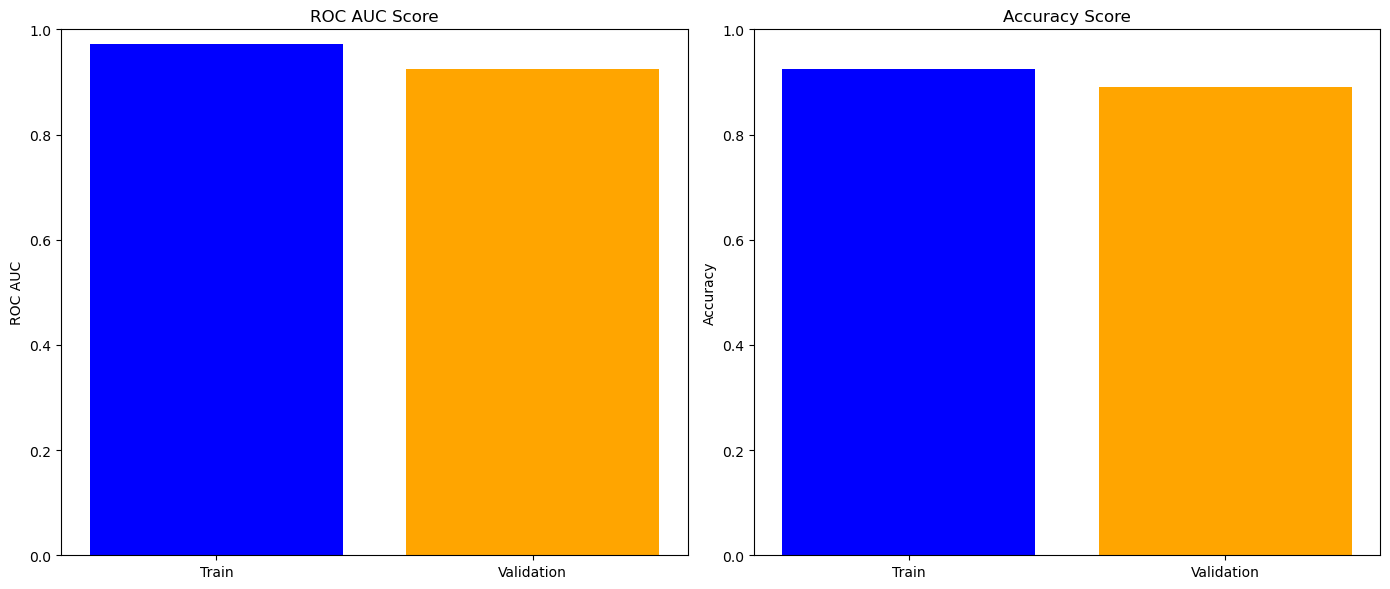

In [18]:
metrics = {
    'ROC AUC': [train_roc_auc, val_roc_auc],
    'Accuracy': [train_accuracy, val_accuracy]
}

# Plot ROC AUC and Accuracy
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# ROC AUC plot
axs[0].bar(['Train', 'Validation'], metrics['ROC AUC'], color=['blue', 'orange'])
axs[0].set_title('ROC AUC Score')
axs[0].set_ylim([0, 1])
axs[0].set_ylabel('ROC AUC')

# Accuracy plot
axs[1].bar(['Train', 'Validation'], metrics['Accuracy'], color=['blue', 'orange'])
axs[1].set_title('Accuracy Score')
axs[1].set_ylim([0, 1])
axs[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [22]:
import joblib

# Save the best model
joblib.dump(best_xgboost_model, 'best_xgboost_model.pkl')

['best_xgboost_model.pkl']

In [23]:
import joblib

# Load the model
loaded_model = joblib.load('best_xgboost_model.pkl')

# Check the type of the loaded model
print(type(loaded_model))

# Check some attributes of the model
print(f"Model Parameters: {loaded_model.get_params()}")


<class 'xgboost.sklearn.XGBClassifier'>
Model Parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 30, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}
